# Analyse of equivalent width

- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- 
- creation date : April 6th  2022
- last update : 


### Configuration H :

    


- **kernel anaconda3_auxtel** at CC or **python 3** locally

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
import pandas as pd

import matplotlib.ticker                         # here's where the formatter is
import os
import re
import pandas as pd

plt.rcParams["figure.figsize"] = (16,4)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

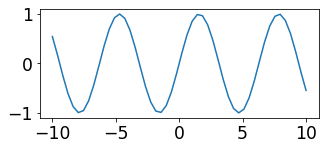

In [3]:
fig=plt.figure(figsize=(5,2))
ax=fig.add_subplot(1,1,1)
X=np.linspace(-10,10,50)
Y=np.sin(X)
ax.plot(X,Y)
plt.show()               

In [4]:
import matplotlib.offsetbox
props = dict(boxstyle='round',edgecolor="w",facecolor="w", alpha=0.5)

In [5]:
from datetime import datetime,date

In [6]:
#pip install fpdf
#from fpdf import FPDF

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

In [8]:
string_date

'2022-05-12'

In [9]:
from iminuit import Minuit
import iminuit

In [10]:
iminuit.__version__

'2.8.4'

In [11]:
from astropy.io import fits
from spectractor import parameters
from spectractor.extractor.extractor import Spectractor
from spectractor.extractor.spectrum import Spectrum, detect_lines
from spectractor.extractor.spectrum import *
#from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, O2_1, H2O_1,H2O_2
from spectractor.extractor.spectroscopy import Lines, Line ,HALPHA, HBETA, HGAMMA, HDELTA,HEPSILON,O2_1,O2B  ,H2O_1, ATMOSPHERIC_LINES
from spectractor.config import load_config
from spectractor import parameters
from spectractor.extractor.images import *
from scipy import ndimage, misc
from scipy.interpolate import interp1d

In [12]:
H2O_2 = Line(960, atmospheric=True, label=r'$H_2 O$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [13]:
import requests
from requests.adapters import HTTPAdapter
from requests.packages.urllib3.util.retry import Retry

In [14]:
from time import sleep

In [15]:
from astropy.time import Time
import astropy.units as u

# Function

In [16]:
def file_tag_forsorting(filename):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('^exposure_.*([0-9][0-9][0-9][0-9][0-9])_postisrccd.*', filename)
    if len(m)>0:
        return m[0]
    else:
        return None


In [17]:
def subdir_tag_forsorting(subdir):
    # m=re.findall('^Cor_holo4_003_.*([0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]_.*)[.]fits$',filename)
    m = re.findall('.*([0-9][0-9][0-9][0-9][0-9])$', subdir)
    if len(m)>0:
        return m[0]
    else:
        return None


In [18]:
file_tag_forsorting('exposure_2022031600330_postisrccd.fits')

'00330'

In [19]:
subdir_tag_forsorting('2022031600330')

'00330'

# Config

In [20]:
# path index for each month
DATE="20220316"

In [21]:
version="v5.0"

In [22]:
# Choose the config filename

list_of_spectractorconfigfiles= ["auxtel_configA.ini","auxtel_configB.ini","auxtel_configC.ini","auxtel_configD.ini","auxtel_configE.ini","auxtel_configF.ini","auxtel_configG.ini","auxtel_configH.ini"]
config_idx =7
configfilename= os.path.join("./config",list_of_spectractorconfigfiles[config_idx])
configdir = (list_of_spectractorconfigfiles[config_idx].split("_")[-1]).split(".") [0]


In [23]:
configdir 

'configH'

# Path

In [24]:
HOSTCC=True

In [25]:
# Set path depending on which computer running (according HOSTCC)
if HOSTCC:
    path_auxtel="/sps/lsst/groups/auxtel"
    path_spectractor=os.path.join(path_auxtel,"softs/github/desc/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    path_images=os.path.join(path_auxtel,"data/2022/holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"data/2022/OutputSpectractor/holo/"+configdir+"/"+DATE)
    
else:
    #path_auxtel="/Users/dagoret/DATA/AuxTelData2021"
    path_auxtel="/Users/sylvie/DATA/AuxTelDATA2022"
    #path_spectractor=os.path.join(path_auxtel,"/users/dagoret/MacOSX/github/LSST/Spectractor")
    path_spectractor=os.path.join(path_auxtel,"/Users/sylvie/MacOSX/GitHub/LSST/Spectractor")
    path_spectractor_config=os.path.join(path_spectractor,"config")
    #path_images=os.path.join(path_auxtel,"holo/quickLookExp_v2/"+DATE)
    path_images=os.path.join(path_auxtel,"holo/"+DATE)
    path_output_spectractor=os.path.join(path_auxtel,"OutputSpectractor/holo/"+configdir+"/"+DATE)
    #path_output_spectractor=os.path.join(path_auxtel,"holo/OutputSpectractor/"+DATE)
    

In [26]:
path_output_spectractor

'/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316'

In [27]:
! ls -l $path_output_spectractor

total 0
drwxrws--- 1 dagoret lsst 2 Apr  4 15:13 2022031600330
drwxrws--- 1 dagoret lsst 2 Apr  4 19:32 2022031600331
drwxrws--- 1 dagoret lsst 2 Apr  5 09:12 2022031600337
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600338
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600344
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600345
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600351
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600352
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600358
drwxrws--- 1 dagoret lsst 2 Apr  5 09:13 2022031600359
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600365
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600366
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600372
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600373
drwxrws--- 1 dagoret lsst 2 Apr  5 09:14 2022031600379
drwxrws--- 1 dagoret lsst 2 Apr  5 09:15 2022031600380
drwxrws--- 1 dagoret lsst 2 Apr  5 09:15 2022031600386
drwxrws--- 1 dagoret lsst 2 Apr  5 09:16 2022031600387
dr

In [28]:
# standard configuration for spectractor
#config = os.path.join(path_spectractor_config,"auxtel.ini")
#config=os.path.join("./config",configfilename)
config=configfilename
print(f">>>>> Spectractor configuration filename : {configfilename}")

>>>>> Spectractor configuration filename : ./config/auxtel_configH.ini


## Logbook for file selection

In [29]:
# Logbook for scan data
filename_logbook='logbooks/auxtelholologbook_'+DATE+'_'+ version+'.csv'

In [30]:
df=pd.read_csv(filename_logbook,index_col=0)

In [31]:
pd.set_option('display.max_rows', None)

In [32]:
df

,index,date,path,file,num,object,filter,disperser,airmass,exposure,...,temperature,humidity,windspd,Obj-posXpix,Obj-posYpix,Dx,Dy,skip,run,quality
0,0,2022-03-17T01:59:37.776,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600330_postisrccd.fits,330,ETA DOR,empty_1,holo4_003,1.385409,20.0,...,10.6,44.0,7.2,NaN,NaN,NaN,NaN,,NaN,NaN
1,1,2022-03-17T02:00:10.693,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600331_postisrccd.fits,331,ETA DOR,empty_1,holo4_003,1.386483,20.0,...,10.6,44.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
2,2,2022-03-17T02:03:04.275,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600337_postisrccd.fits,337,ETA DOR,empty_1,holo4_003,1.392269,20.0,...,10.6,43.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
3,3,2022-03-17T02:03:37.365,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600338_postisrccd.fits,338,ETA DOR,empty_1,holo4_003,1.393378,20.0,...,10.6,43.0,7.4,NaN,NaN,NaN,NaN,,NaN,NaN
4,4,2022-03-17T02:06:31.026,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600344_postisrccd.fits,344,ETA DOR,empty_1,holo4_003,1.399309,20.0,...,10.5,43.0,8.2,NaN,NaN,NaN,NaN,,NaN,NaN
5,5,2022-03-17T02:07:03.927,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600345_postisrccd.fits,345,ETA DOR,empty_1,holo4_003,1.400449,20.0,...,10.5,43.0,7.6,NaN,NaN,NaN,NaN,,NaN,NaN
6,6,2022-03-17T02:11:00.681,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600351_postisrccd.fits,351,HD111980,empty_1,holo4_003,1.647734,20.0,...,10.5,43.0,13.1,300.0,1700.0,NaN,NaN,,1.0,1.0
7,7,2022-03-17T02:11:33.581,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600352_postisrccd.fits,352,HD111980,empty_1,holo4_003,1.643280,20.0,...,10.5,43.0,13.1,NaN,NaN,NaN,NaN,,NaN,NaN
8,8,2022-03-17T02:14:30.261,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600358_postisrccd.fits,358,HD111980,empty_1,holo4_003,1.619945,20.0,...,10.5,43.0,12.1,NaN,NaN,NaN,NaN,,NaN,NaN
9,9,2022-03-17T02:15:03.181,/sps/lsst/groups/auxtel/data/2022/holo/20220316,exposure_2022031600359_postisrccd.fits,359,HD111980,empty_1,holo4_003,1.615702,20.0,...,10.5,44.0,6.9,NaN,NaN,NaN,NaN,,NaN,NaN


## Selection of input files

In [33]:
# Do not consider flag
#df_good=df[df["quality"]==1]

In [34]:
df_good=df
df_good["quality"] = 1

In [35]:
for spectra_file in df_good["file"]:
    print(spectra_file)

exposure_2022031600330_postisrccd.fits
exposure_2022031600331_postisrccd.fits
exposure_2022031600337_postisrccd.fits
exposure_2022031600338_postisrccd.fits
exposure_2022031600344_postisrccd.fits
exposure_2022031600345_postisrccd.fits
exposure_2022031600351_postisrccd.fits
exposure_2022031600352_postisrccd.fits
exposure_2022031600358_postisrccd.fits
exposure_2022031600359_postisrccd.fits
exposure_2022031600365_postisrccd.fits
exposure_2022031600366_postisrccd.fits
exposure_2022031600372_postisrccd.fits
exposure_2022031600373_postisrccd.fits
exposure_2022031600379_postisrccd.fits
exposure_2022031600380_postisrccd.fits
exposure_2022031600386_postisrccd.fits
exposure_2022031600387_postisrccd.fits
exposure_2022031600393_postisrccd.fits
exposure_2022031600394_postisrccd.fits
exposure_2022031600400_postisrccd.fits
exposure_2022031600401_postisrccd.fits
exposure_2022031600420_postisrccd.fits
exposure_2022031600421_postisrccd.fits
exposure_2022031600427_postisrccd.fits
exposure_2022031600428_po

## Selection of Spectractor output files

In [36]:
# total number of exposures
NBEXP=0
# total number of exposures without dir
NBEXPNODIR=0
# total number of exposures with dir
NBEXPWTHDIR=0
# total number of exposures with plots
NBEXPWTHPLT=0
# total number of exposures with spectra
NBEXPWTHSPEC=0

# list of exposures
LISTNUM=[]
# list of exposure without dir (not run spectraction)
LISTNUMNODIR=[]
# list of exposure with dir (spectraction has been run)
LISTNUMWTHDIR=[]
# list of exposures with plots (Spectractor has run up to some point)
LISTNUMWTHPLOTS=[]
# list of exposures with spectraction output (Spectractor has completed)
LISTNUMWTHSPECTR=[]

# list of selected spectra path
List_of_spectra_path=[]

In [37]:
list_of_files=os.listdir(path_output_spectractor)
list_of_files=sorted(list_of_files)


print("list of subdir found ",list_of_files)

for subdir in list_of_files:
    
    
    #tag = file_tag_forsorting(subdir)
    tag = subdir_tag_forsorting(subdir)
    
        
    print(tag)    
    #if tag is not None and int(tag)<317:
    #    continue
    if tag is None :
        continue
  
    
    
    fulldir=os.path.join(path_output_spectractor,subdir)



    if not os.path.isdir(fulldir):
        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is not a directory".format(subdir))
        

        NBEXPNODIR+=1


    else:

        
        print("---------------------------------------------")
        print(subdir," \t  ",tag)
        print("{} is a directory".format(subdir))

        tagname=subdir_tag_forsorting(subdir)
        print("tagname= {}".format(tagname))
        #targetname=file_target(subdir)
        #print("targetname= {}".format(targetname))
        



        NBEXP += 1
        LISTNUM.append(tagname)



        dir_plots=os.path.join(fulldir,"plots")
        dir_spectration = os.path.join(fulldir, "basespec")

        flag_empty1 = True
        flag_empty2 = True


        if os.path.isdir(dir_plots):
            if any(os.scandir(dir_plots)):
                print("dir_plots is not empty")
                NBEXPWTHPLT+=1
                LISTNUMWTHPLOTS.append(tagname)
                flag_empty1 = False

            else:
                print("dir_plots is empty")


        if os.path.isdir(dir_spectration):
            if any(os.scandir(dir_spectration)):
                print("dir_spectration is not empty")
                NBEXPWTHSPEC+=1
                LISTNUMWTHSPECTR.append(tagname)
                flag_empty2 = False
                List_of_spectra_path.append(dir_spectration)

            else:
                print("dir_spectration is empty")

        if flag_empty1 and flag_empty2 :
            NBEXPNODIR+=1
            LISTNUMNODIR.append(tagname)
        else:
            NBEXPWTHDIR += 1
            LISTNUMWTHDIR.append(tagname)



print("-----------------------------------------------------------------")


#LISTNUM=sorted(LISTNUM)
#LISTNUMNODIR=sorted(LISTNUMNODIR)
#LISTNUMWTHDIR=sorted(LISTNUMWTHDIR)
#LISTNUMWTHPLOTS=sorted(LISTNUMWTHPLOTS)
#LISTNUMWTHSPECTR=sorted(LISTNUMWTHSPECTR)
List_of_spectra_path=sorted(List_of_spectra_path)

print("Full list of Exposures : .......................{}".format(LISTNUM))
print("Full list of Exposures without output dir: .....{}".format(LISTNUMNODIR))
print("Full list of Exposures with output dir: ....... {}".format(LISTNUMWTHDIR))
print("Full list of Exposures with output plots: ..... {}".format(LISTNUMWTHPLOTS))
print("Full list of Exposures with output spectra: ....{}".format(LISTNUMWTHSPECTR))




print("Total number of exposures : .....................{}".format(NBEXP))
print("Total number of exposures without dir : .........{}".format(NBEXPNODIR))
print("Total number of exposures with dir :.............{}".format(NBEXPWTHDIR))
print("Total number of exposures with plots : ..........{}".format(NBEXPWTHPLT))
print("Total number of exposures with spectra: .........{}".format(NBEXPWTHSPEC))


list of subdir found  ['2022031600330', '2022031600331', '2022031600337', '2022031600338', '2022031600344', '2022031600345', '2022031600351', '2022031600352', '2022031600358', '2022031600359', '2022031600365', '2022031600366', '2022031600372', '2022031600373', '2022031600379', '2022031600380', '2022031600386', '2022031600387', '2022031600393', '2022031600394', '2022031600400', '2022031600401', '2022031600420', '2022031600421', '2022031600427', '2022031600428', '2022031600434', '2022031600435']
00330
---------------------------------------------
2022031600330  	   00330
2022031600330 is a directory
tagname= 00330
dir_plots is not empty
dir_spectration is not empty
00331
---------------------------------------------
2022031600331  	   00331
2022031600331 is a directory
tagname= 00331
dir_plots is not empty
dir_spectration is not empty
00337
---------------------------------------------
2022031600337  	   00337
2022031600337 is a directory
tagname= 00337
dir_plots is not empty
dir_spectra

In [38]:
#dir_spectra="outputs_reprocess"
print(List_of_spectra_path)

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600344/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600345/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600351/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600358/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600366/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600372/basespec', '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600373/basespec',

In [39]:
config

'./config/auxtel_configH.ini'

## Extraction of spectra

In [40]:
all_files_spectra = []
all_files_spectrogram = []
all_files_lines = []
all_files_table = []

# loop on topdir
for dir_spectra in List_of_spectra_path:
    for filename in os.listdir(dir_spectra):
        if re.search("_spectrum.fits$",filename):
            the_file_spectrum=os.path.join(dir_spectra,filename)
            all_files_spectra.append(the_file_spectrum)
            the_file_spectrogram=the_file_spectrum.replace("_spectrum","_spectrogram")
            all_files_spectrogram.append(the_file_spectrogram)
            the_file_lines=the_file_spectrum.replace("_spectrum.fits","_lines.csv")
            all_files_lines.append(the_file_lines)
            the_file_table=the_file_spectrum.replace("_spectrum.fits","_table.csv")
            all_files_table.append(the_file_table)
    

In [41]:
all_files_spectra[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_spectrum.fits']

In [42]:
all_files_spectrogram[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrogram.fits',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_spectrogram.fits']

In [43]:
all_files_lines[:3]

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_lines.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_lines.csv']

In [44]:
all_files_table[:3] 

['/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_table.csv',
 '/sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600337/basespec/exposure_2022031600337_postisrccd_table.csv']

## Selection of good spectra

In [45]:
all_good_spectra_spectrum_files = sorted(all_files_spectra)

In [46]:
N=len(all_good_spectra_spectrum_files)

# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

## All Spectra

0 ) exposure_2022031600330_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600330/basespec/exposure_2022031600330_postisrccd_spectrum.fits
No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T01:59:23.629
set expo to 20.0
set airmass to 1.38578152736243
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1328767654984717
set dec to -66.0397222222222
set hour_angle to 42.0596414253711
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 614.3216265213576
set parallactic_angle to 56.6019400533159


/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/sps/lsst/groups/auxtel/softs/utils/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ...  Z_VALUE  SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                           
----------- ------------- ------------- ... --------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ... 0.0000590                1
1 ) exposure_2022031600331_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits
No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T01:59:56.544
set expo to 20.0
set airmass to 1.386860919079735
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.143414192888017
set dec to -66.0397222222222
set hour_angle to 42.19664412811424
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 640.2918338104603
set parallactic_angle to 56.75888867802155
t

/tmp/ipykernel_3147/1061354010.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig=plt.figure(figsize=(16,4))


No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T03:15:47.551
set expo to 20.0
set airmass to 1.279213132458975
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.1674602010925815
set dec to -18.5222222222222
set hour_angle to -40.81998111646455
set temperature to 10.7
set pressure to 743.5
set humidity to 49.0
set lambda_ref to 665.3594564651956
set parallactic_angle to -115.5470881311961
target_name = HD111980, Selected object name for Simbad : HD111980
 MAIN_ID        RA           DEC      ... Z_VALUE_21 SCRIPT_NUMBER_ID
             "h:m:s"       "d:m:s"    ...                            
--------- ------------- ------------- ... ---------- ----------------
HD 111980 12 53 15.0529 -18 31 20.013 ...  0.0005170                1
21 ) exposure_2022031600434_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600434/basespec/exposure_2022031600434_postisrccd_spectrum.fits


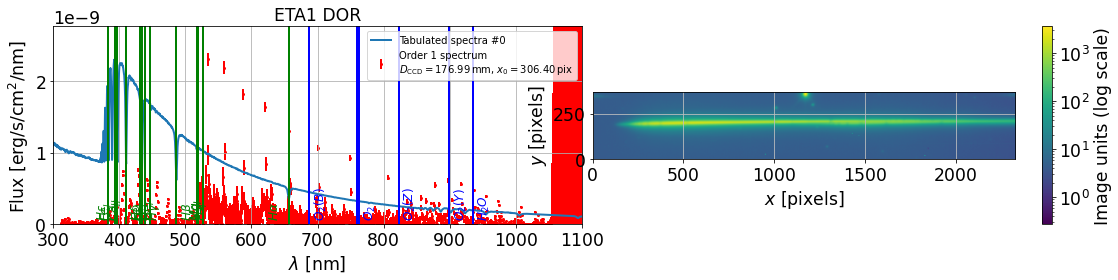

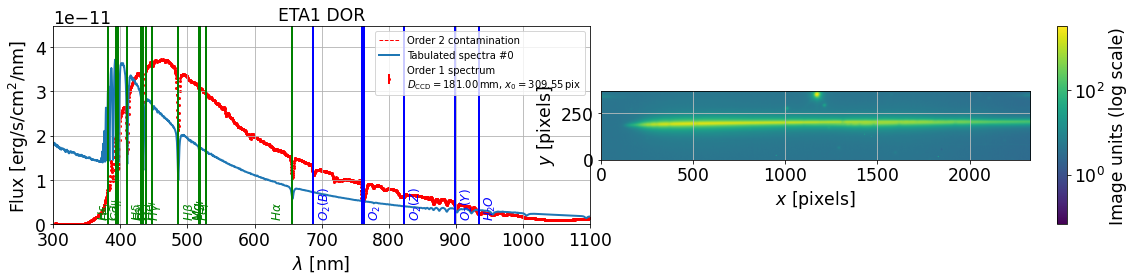

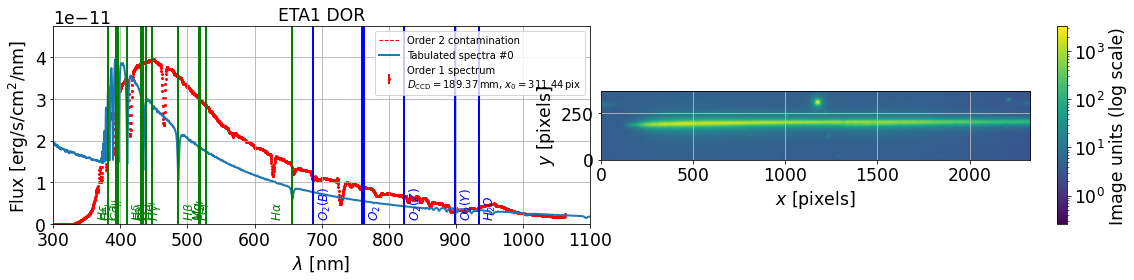

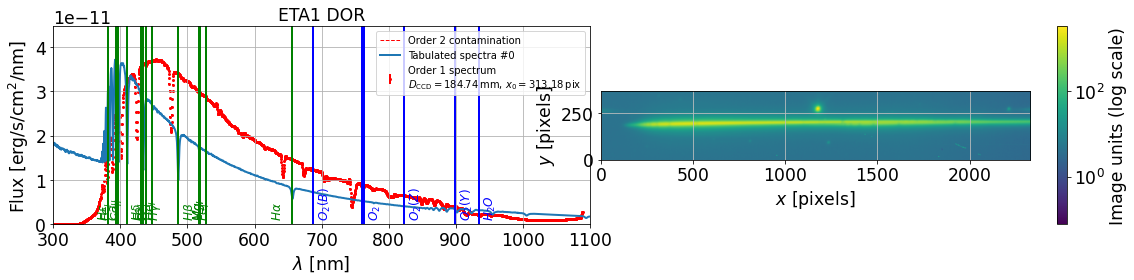

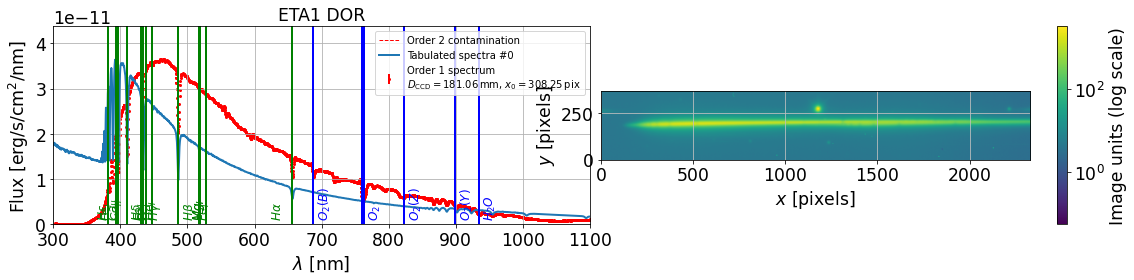

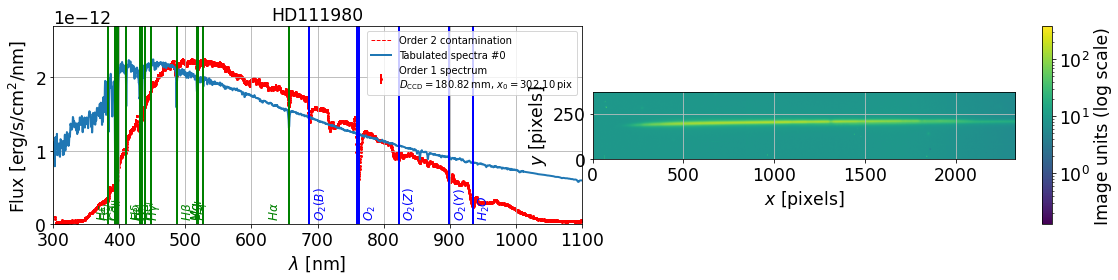

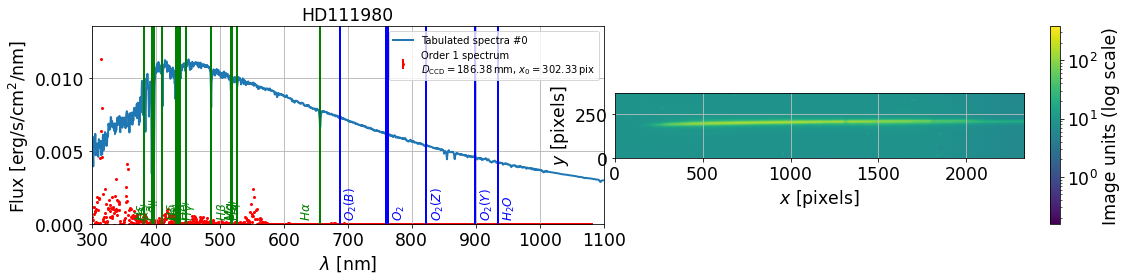

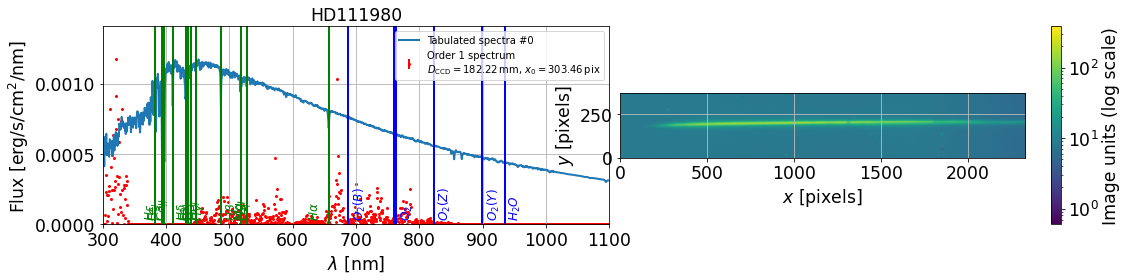

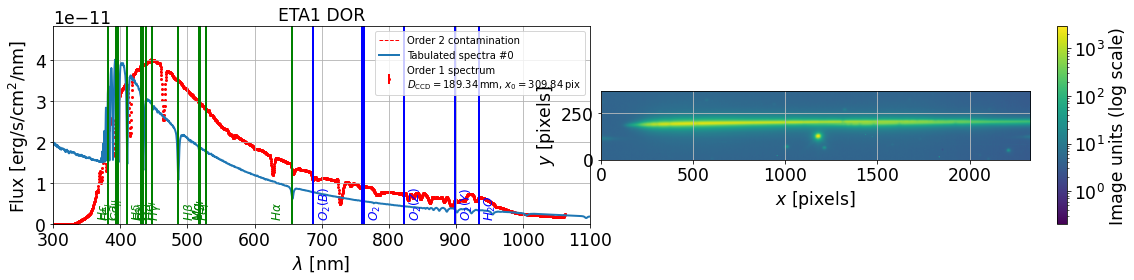

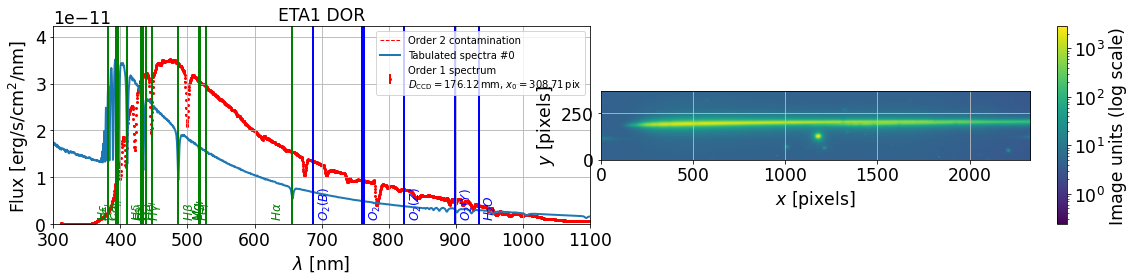

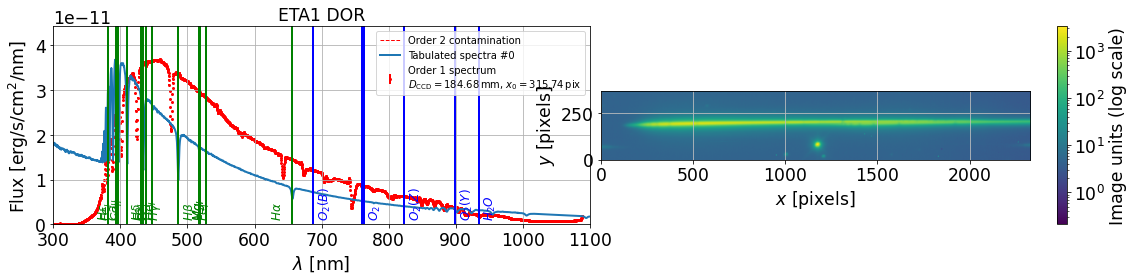

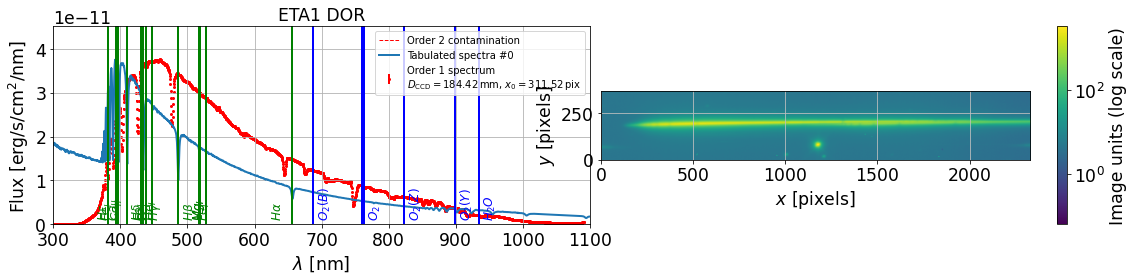

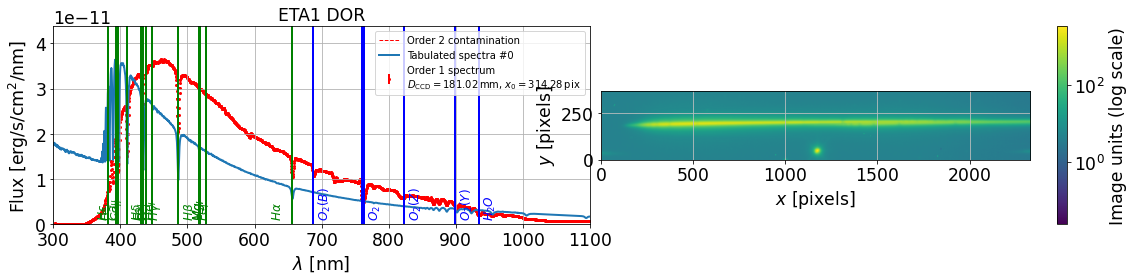

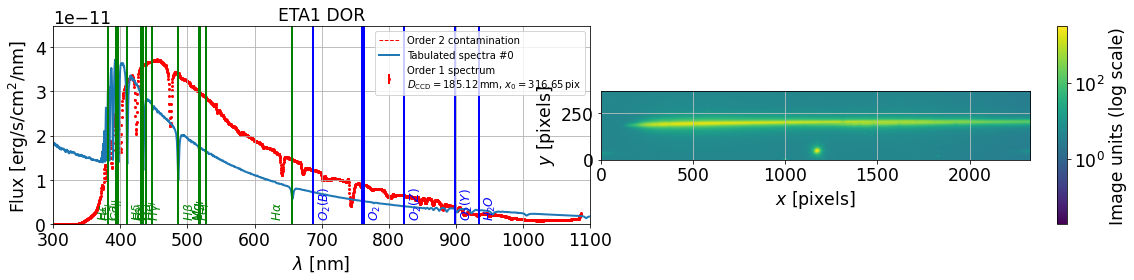

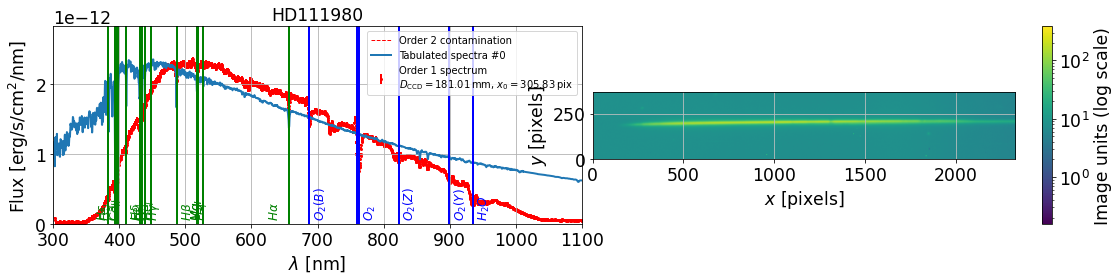

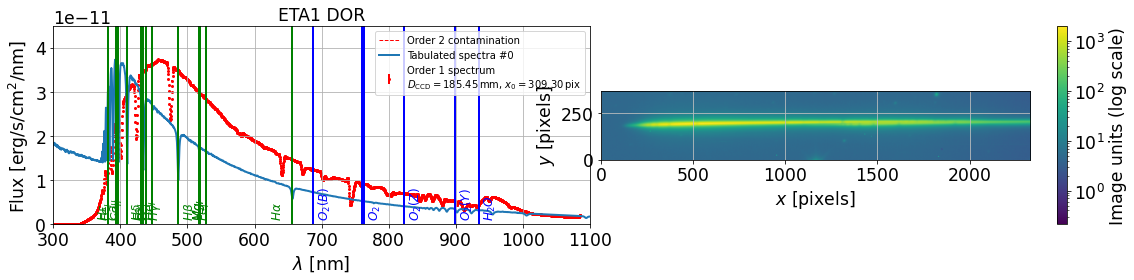

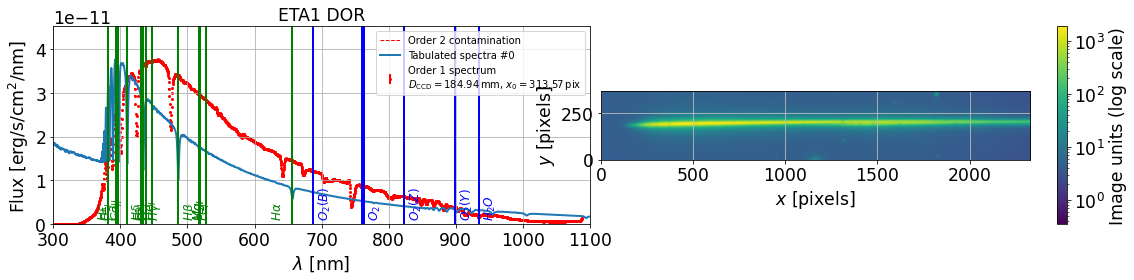

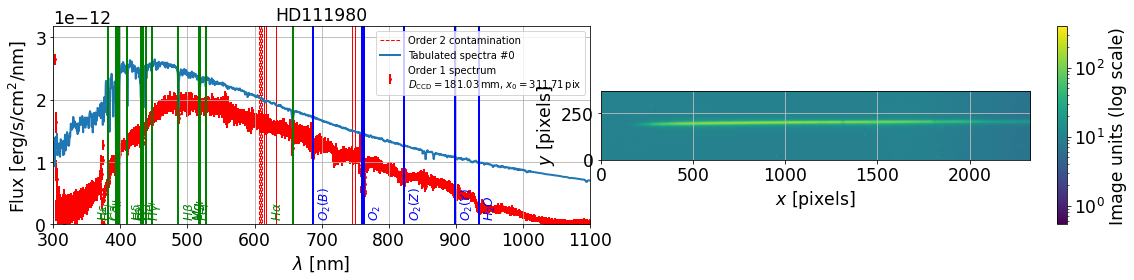

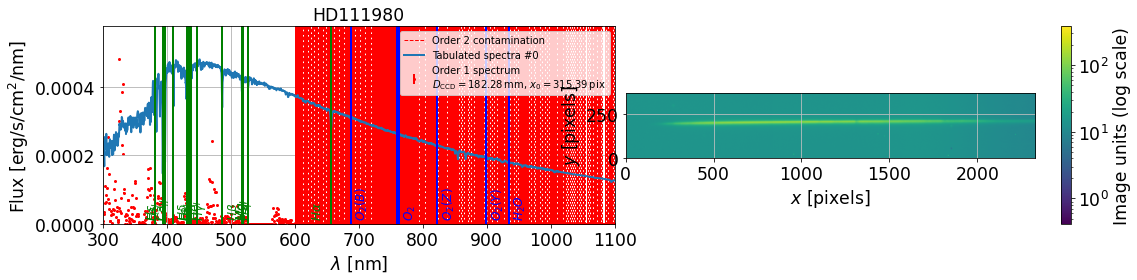

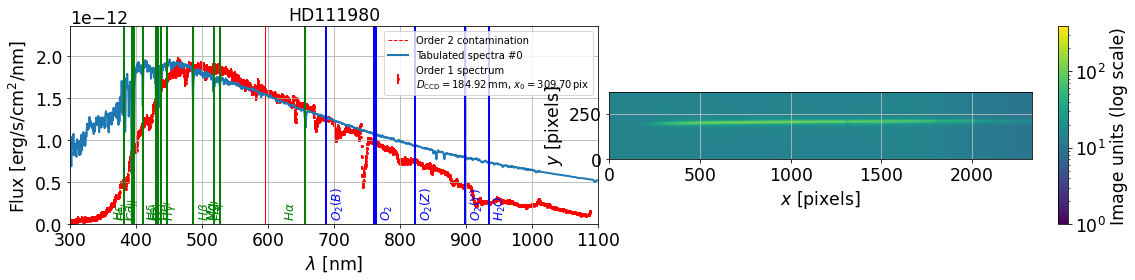

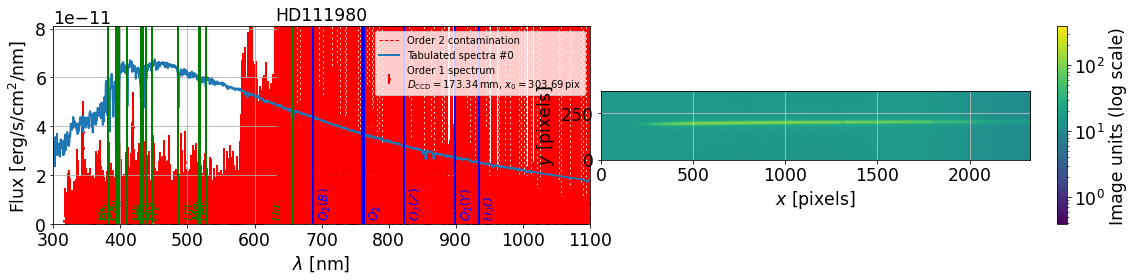

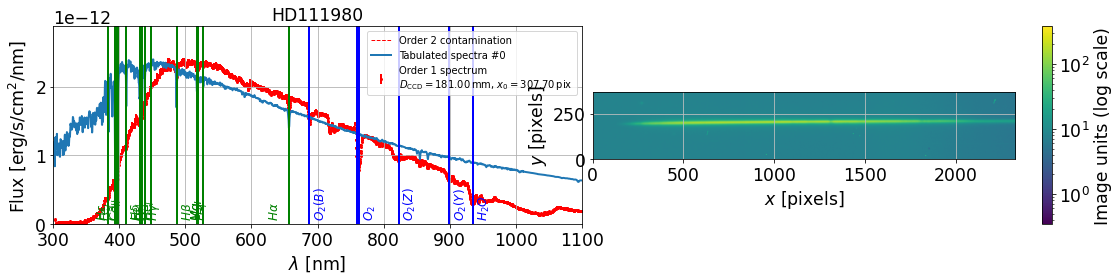

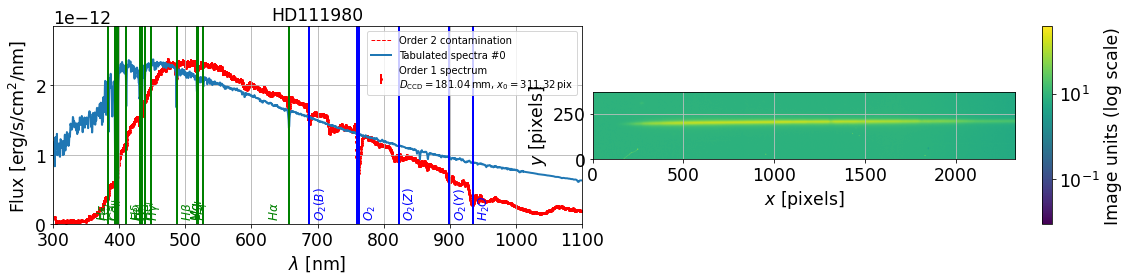

In [47]:
parameters.DISPLAY=True
FLAG_ORDER2 = True



infos = []
all_lambdas=[]
all_data=[]
all_data_err=[]

if FLAG_ORDER2:
    all_lambdas_order2=[]
    all_data_order2=[]
    all_data_err_order2=[]
    
    
all_num=[]
all_figs = []

idx=0
for fullfilename in all_good_spectra_spectrum_files:
    
    filename = os.path.basename(fullfilename)
    print(idx,")",filename," ",fullfilename)
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    
    filename= os.path.basename(fullfilename)
    tag=file_tag_forsorting(filename.split(".")[0])
    all_num.append(tag)
    
   
     
    s=Spectrum(fullfilename, config=config,fast_load=False)
    label=filename.split('.')[0]+" "
    #s.plot_spectrum(ax=ax1,force_lines=True,label=label)
    s.plot_spectrum(ax=ax1,force_lines=True)
    
    all_lambdas.append(s.lambdas)
    all_data.append(s.data)
    all_data_err.append(s.err)
    
    if FLAG_ORDER2:
        all_lambdas_order2.append(s.lambdas_order2)
        all_data_order2.append(s.data_order2)
        all_data_err_order2.append(s.err_order2)
    
    ax2 = fig.add_subplot(1, 2, 2)
    
    fullfilename2=all_files_spectrogram[idx]
    
    s.load_spectrogram(fullfilename2)
    s.plot_spectrogram(ax=ax2,scale="log")
    
    
    infos.append([idx,tag,s.target.label,s.date_obs,s.airmass,s.temperature,s.pressure,s.humidity])
    
    
    plt.show()
    all_figs.append(fig)
    
    idx+=1
    

## View one spectrum

1 ) exposure_2022031600331_postisrccd_spectrum.fits   /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits
No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T01:59:56.544
set expo to 20.0
set airmass to 1.386860919079735
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.143414192888017
set dec to -66.0397222222222
set hour_angle to 42.19664412811424
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 640.2918338104603
set parallactic_angle to 56.75888867802155
target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ... Z_VALUE_24 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                            
----------- ------------- ------------- ... ---------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ...  0.0000590               

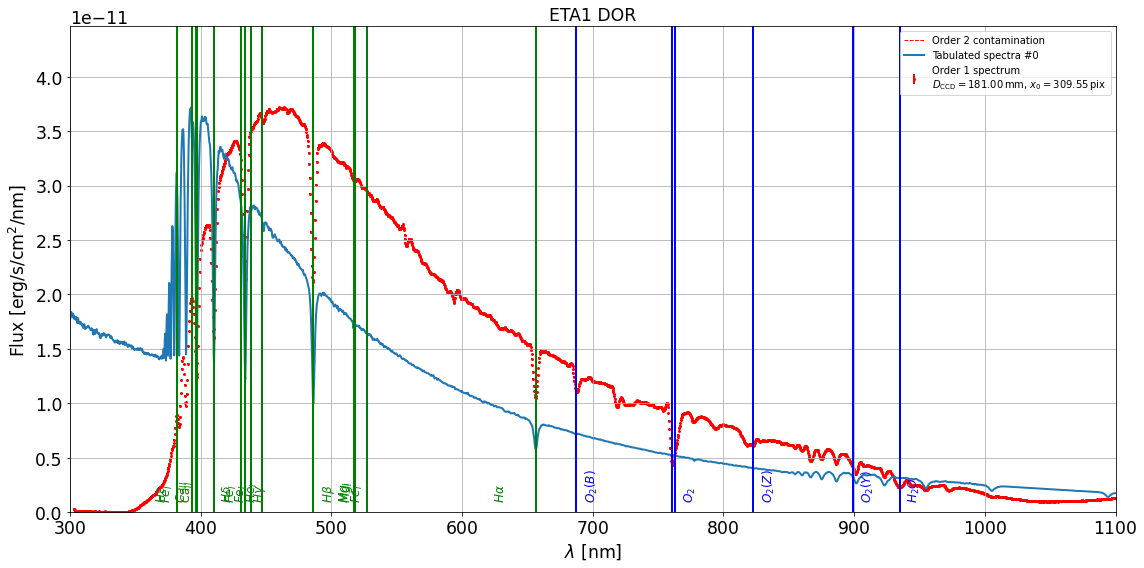

In [48]:
idx=1
targetname="ETA1 DOR"

fullfilename = all_good_spectra_spectrum_files[idx]
    
filename = os.path.basename(fullfilename)
print(idx,")",filename," ",fullfilename)
    
    
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
    
filename= os.path.basename(fullfilename)
tag=file_tag_forsorting(filename.split(".")[0])
all_num.append(tag)
    
   
     
s=Spectrum(fullfilename, config=config,fast_load=False)
label=filename.split('.')[0]+" "
#s.plot_spectrum(ax=ax1,force_lines=True,label=label)
s.plot_spectrum(ax=ax1,force_lines=True)
    
plt.show()
    

/tmp/ipykernel_3147/3252921793.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='major', color='b', linestyle='-')
/tmp/ipykernel_3147/3252921793.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='minor', color='grey', linestyle='-')


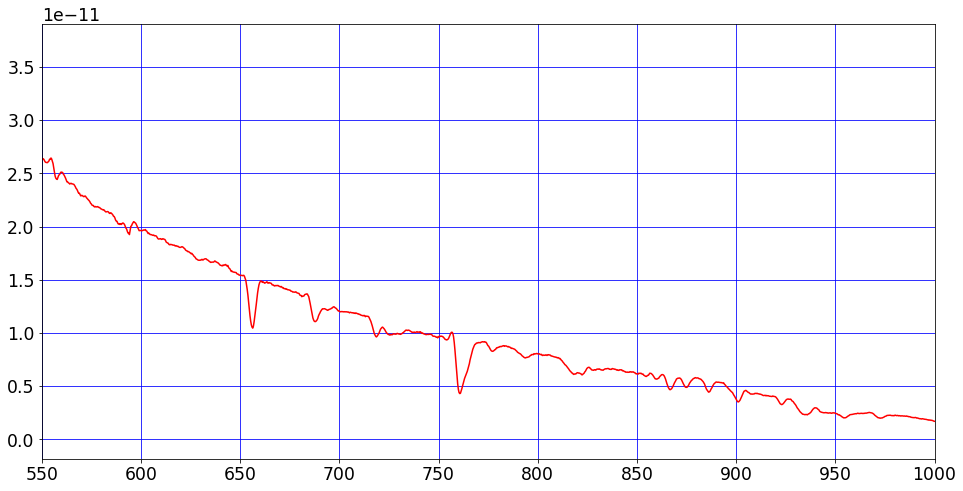

In [49]:
fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(all_lambdas[idx],all_data[idx],'r-')
ax1.set_xlim(550,1000)
ax1.grid(b=True, which='major', color='b', linestyle='-')
ax1.grid(b=True, which='minor', color='grey', linestyle='-')


## Info

In [50]:
df_infos=pd.DataFrame(infos,columns=["idx","num","object","date_obs","airmass","temperature","pressure","humidity"])

In [51]:
df_infos.set_index('idx',inplace=True)

In [52]:
all_reftime=[ (Time(tt)-Time( df_infos["date_obs"].values[0])).to_value(u.hr) for tt in df_infos["date_obs"].values ]

In [53]:
all_reftime=np.array(all_reftime)

In [54]:
df_infos["reftime"]=all_reftime

In [55]:
df_infos["eqw_h2o"] = np.nan
df_infos["eqw_h2o_2"] = np.nan
df_infos["eqw_h2o_3"] = np.nan
df_infos["eqw_o2"] = np.nan
df_infos["eqw_o2b"] = np.nan
df_infos["eqw_halpha"] = np.nan
df_infos["eqw_hbeta"] = np.nan
df_infos["eqw_hgamma"] = np.nan

#df_infos["eqw_o2_spec"] = np.nan

In [56]:
df_infos

,num,object,date_obs,airmass,temperature,pressure,humidity,reftime,eqw_h2o,eqw_h2o_2,eqw_h2o_3,eqw_o2,eqw_o2b,eqw_halpha,eqw_hbeta,eqw_hgamma
idx,,,,,,,,,,,,,,,,
0,00330,ETA1 DOR,2022-03-17T01:59:23.629,1.385782,10.6,743.55,44.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00331,ETA1 DOR,2022-03-17T01:59:56.544,1.386861,10.6,743.55,44.0,0.009143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00337,ETA1 DOR,2022-03-17T02:02:50.136,1.392651,10.6,743.55,43.0,0.057363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00344,ETA1 DOR,2022-03-17T02:06:16.878,1.399703,10.5,743.55,43.0,0.114791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00345,ETA1 DOR,2022-03-17T02:06:49.784,1.400843,10.5,743.55,43.0,0.123932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,00351,HD111980,2022-03-17T02:10:46.532,1.646195,10.5,743.60,43.0,0.189695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00358,HD111980,2022-03-17T02:14:16.103,1.618469,10.5,743.55,43.0,0.247909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,00366,HD111980,2022-03-17T02:18:18.332,1.587925,10.5,743.60,42.0,0.315195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,00372,ETA1 DOR,2022-03-17T02:22:24.873,1.435249,10.5,743.55,42.0,0.383679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
NN = len(df_infos)

## Equivalent width

In [58]:
from astropy import units as u
from astropy.visualization import quantity_support

quantity_support()  # for getting units on the axes below  

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fbf27e8e310>

In [59]:
from specutils import Spectrum1D
from specutils.fitting import fit_generic_continuum,fit_continuum
from specutils import SpectralRegion
from specutils.analysis import equivalent_width
from astropy.modeling import models
from specutils.manipulation import extract_region

In [60]:
IDXSEL=1
filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
thetitle=str(IDXSEL)+") "+filename_SEL

In [61]:
s=Spectrum(fullfilename_SEL, config=config)
s.load_spectrogram(fullfilename_spectrogram_SEL) 

No rebinning: parameters.REBIN is forced to 1.
set date_obs to 2022-03-17T01:59:56.544
set expo to 20.0
set airmass to 1.386860919079735
set disperser_label to holo4_003
set units to erg/s/cm$^2$/nm
set rotation_angle to 0.143414192888017
set dec to -66.0397222222222
set hour_angle to 42.19664412811424
set temperature to 10.6
set pressure to 743.55
set humidity to 44.0
set lambda_ref to 640.2918338104603
set parallactic_angle to 56.75888867802155
target_name = etador, Selected object name for Simbad : ETA1 DOR
  MAIN_ID         RA           DEC      ... Z_VALUE_25 SCRIPT_NUMBER_ID
               "h:m:s"       "d:m:s"    ...                            
----------- ------------- ------------- ... ---------- ----------------
* eta01 Dor 06 06 09.3817 -66 02 22.635 ...  0.0000590                1


In [62]:
lines = Lines([O2_1,H2O_1,H2O_2],atmospheric_lines=True, redshift=0, emission_spectrum=False)

In [63]:
s.lines = lines

In [64]:
lambdas = np.arange(300,1000,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)

In [65]:
#global_chisq = detect_lines(lines, s.lambdas, s.data, s.err, fwhm_func=fwhm_func)

In [66]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

In [67]:
def ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=None,ax2=None,returnlineshape=False):
    """
    """
       # line central position        
    wlline0 = np.average([wlminline.value,wlmaxline.value])
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
    
    
    # work with inset
    idx_inset0 = np.where(np.logical_and(spec.spectral_axis>wlminline , spec.spectral_axis<wlmaxline))[0]
    idx_inset1 = np.where(np.logical_and(spec.spectral_axis>wlmin , spec.spectral_axis<wlmax))[0]
    
    
    wl_inset0 = spec.spectral_axis[idx_inset0]
    wl_inset1 = spec.spectral_axis[idx_inset1]
    f0=cont_norm_spec.flux[idx_inset0]
    f1=cont_norm_spec.flux[idx_inset1]
    
    fluxratio_inset0 = 1-f0
    fluxratio_inset1 = 1-f1
    
    # compute equivalent width by integration of (1-fluxratio(wl)) dwl
    eqw3 = np.trapz(fluxratio_inset0,wl_inset0)
    
    
    eqw1=equivalent_width(cont_norm_spec, regions=line_region) 
    eqw2=equivalent_width(cont_norm_spec, regions=sub_region)  
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\AA$ ".format(eqw1.value)
        eqw_str2="$Eqw_2$ = {:2.2f} $\AA$ ".format(eqw2.value)
        eqw_str3="$Eqw_3$ = {:2.2f} $\AA$ ".format(eqw3.value)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2),
        r'{}'.format(eqw_str3)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        if wlline0 > 7000:
            ax2.text(0.05, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        else:
            ax2.text(0.55, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
                    
        
        # plot insert  on right figure
        if wlline0 > 7000:
            loc=2
        else:
            loc=1
        
        axins = inset_axes(ax2,
                    width="42%", # width = 30% of parent_bbox
                    height="42%", # height : 1 inch
                    loc=loc)
        axins.plot(spec.spectral_axis[idx_inset1], cont_norm_spec.flux[idx_inset1],'b-')
        axins.plot(spec.spectral_axis[idx_inset0], cont_norm_spec.flux[idx_inset0],'r-o')
        
        #axins.plot(wl_inset1, fluxratio_inset1,'b-')
        #axins.plot(wl_inset0, fluxratio_inset0,'r-o')
            
        
        axins.grid()
        
        
        
        # plot insert  on right figure
        if wlline0 > 7000:
            loc=2
        else:
            loc=1
        
        axins1 = inset_axes(ax1,
                    width="30%", # width = 30% of parent_bbox
                    height="30%", # height : 1 inch
                    loc=loc)
        axins1.plot(spec.spectral_axis[idx_inset1], cont_norm_spec.flux[idx_inset1],'b-')
        axins1.plot(spec.spectral_axis[idx_inset0], cont_norm_spec.flux[idx_inset0],'r-o')
        
        #axins.plot(wl_inset1, fluxratio_inset1,'b-')
        #axins.plot(wl_inset0, fluxratio_inset0,'r-o')
            
        
        axins1.grid()
        
        
        
        
    if returnlineshape:
        return eqw1.value,eqw2.value,eqw3.value,wl_inset0,f0,wl_inset1,f1
    else:
        return eqw1.value,eqw2.value,eqw3.value     

    

In [68]:
def ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=None,ax2=None):
    """
    
    ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True)
    
    - input :
    
    
    - output :
    
    """
    # line central position        
    wlline0 = np.average([wlminline.value,wlmaxline.value])
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
    
    eqw1=equivalent_width(cont_norm_spec, regions=line_region) 
    eqw2=equivalent_width(cont_norm_spec, regions=sub_region)  
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\AA$ ".format(eqw1.value)
        eqw_str2="$Eqw_2$ = {:2.2f} $\AA$ ".format(eqw2.value)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        if wlline0 > 7000:
            ax2.text(0.05, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        else:
            ax2.text(0.55, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
            
            
        idx_inset0 = np.where(np.logical_and(spec.spectral_axis>wlminline , spec.spectral_axis<wlmaxline))[0]
        idx_inset1 = np.where(np.logical_and(spec.spectral_axis>wlmin , spec.spectral_axis<wlmax))[0]
        
       
        if wlline0 > 7000:
            loc=4
        else:
            loc=2
        
        axins = inset_axes(ax2,
                    width="42%", # width = 30% of parent_bbox
                    height="42%", # height : 1 inch
                    loc=loc)
        axins.plot(spec.spectral_axis[idx_inset1], cont_norm_spec.flux[idx_inset1],'b-')
        axins.plot(spec.spectral_axis[idx_inset0], cont_norm_spec.flux[idx_inset0],'r-o')
        axins.grid()
        
        
    return eqw1.value,eqw2.value     


In [69]:
def ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=None,ax2=None):
    """
    
    ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline)
    
    - input :
    
    
    - output :
    
    """
    
    # line central position        
    wlline0 = np.average([wlminline.value,wlmaxline.value])
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
         
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
       
    eqw10=equivalent_width(cont_norm_spec, regions=line_region).value 
    eqw20=equivalent_width(cont_norm_spec, regions=sub_region).value 
    
    
    
    
    # work with inset
    idx_inset0 = np.where(np.logical_and(spec.spectral_axis>wlminline , spec.spectral_axis<wlmaxline))[0]
    idx_inset1 = np.where(np.logical_and(spec.spectral_axis>wlmin , spec.spectral_axis<wlmax))[0]
    
    
    wl_inset0 = spec.spectral_axis[idx_inset0]
    wl_inset1 = spec.spectral_axis[idx_inset1]
    
    fluxratio_inset0 = 1-cont_norm_spec.flux[idx_inset0]
    fluxratio_inset1 = 1-cont_norm_spec.flux[idx_inset1]
    
    # compute equivalent width by integration of (1-fluxratio(wl)) dwl
    eqw30 = np.trapz(fluxratio_inset0,wl_inset0)
    
    
    
       
    # Bootstrap
    
    
    eqw1_set=np.zeros(NN)
    eqw2_set=np.zeros(NN)
    eqw3_set=np.zeros(NN)
    
    
    size=len(specerr.flux)
    
    # loop on trials 
    for idx in np.arange(NN):
        
        # random generator for errors
        s = np.random.normal(0, 1, size)
        
        # new flux
        newspec = Spectrum1D(spectral_axis=spec.spectral_axis, flux=spec.flux+specerr.flux*s)
              
    
        # region where one extract the spectrum
        sub_spectrum = extract_region(newspec, sub_region)
    
        # initialisaition of linear model
        g_init = models.Linear1D(slope=0,intercept=1e-12)
    
        # fit on sub-spectrum
        g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
        # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
        g2_fit = fit_continuum(newspec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
        y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
        y_continuum_fitted2 = g2_fit(newspec.spectral_axis)
    
        # normalize the spectrum
        cont_norm_spec = newspec/ y_continuum_fitted2 
    
    
        eqw1_b=equivalent_width(cont_norm_spec, regions=line_region) 
        eqw2_b=equivalent_width(cont_norm_spec, regions=sub_region) 
        
        
        eqw1_set[idx]=eqw1_b.value
        eqw2_set[idx]=eqw2_b.value
        
        # work with inset
        idx_inset0 = np.where(np.logical_and(newspec.spectral_axis>wlminline , newspec.spectral_axis<wlmaxline))[0]
        idx_inset1 = np.where(np.logical_and(newspec.spectral_axis>wlmin , newspec.spectral_axis<wlmax))[0]
    
    
        wl_inset0 = newspec.spectral_axis[idx_inset0]
        wl_inset1 = newspec.spectral_axis[idx_inset1]
    
        fluxratio_inset0 = 1-cont_norm_spec.flux[idx_inset0]
        fluxratio_inset1 = 1-cont_norm_spec.flux[idx_inset1]
    
        # compute equivalent width by integration of (1-fluxratio(wl)) dwl
        eqw3_b = np.trapz(fluxratio_inset0,wl_inset0)
        eqw3_set[idx]=eqw3_b.value
        
     
    eqw1_std=eqw1_set.std()
    eqw2_std=eqw2_set.std()
    eqw3_std=eqw3_set.std()
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw10,eqw1_std)
        eqw_str2="$Eqw_2$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw20,eqw2_std)
        eqw_str3="$Eqw_3$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw30,eqw3_std)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2),
        r'{}'.format(eqw_str3)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        
        if wlline0 > 7000:
            ax2.text(0.05, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        else:
            ax2.text(0.55, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        
        
               
        
    return eqw10,eqw20,eqw30,eqw1_set,eqw2_set,eqw3_set      


In [70]:
def ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=None,ax2=None):
    """
    
    ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline)
    
    - input :
    
    
    - output :
    
    """
    
    # line central position        
    wlline0 = np.average([wlminline.value,wlmaxline.value])
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
         
    
    # region used to fit bacgroud        
    sub_region = SpectralRegion(wlmin , wlmax)
    # line region to remove background
    line_region = SpectralRegion(wlminline , wlmaxline)
    
    # region where one extract the spectrum
    sub_spectrum = extract_region(spec, sub_region)
    
    # initialisaition of linear model
    g_init = models.Linear1D(slope=0,intercept=1e-12)
    
    # fit on sub-spectrum
    g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
    # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
    g2_fit = fit_continuum(spec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
    y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
    y_continuum_fitted2 = g2_fit(spec.spectral_axis)
    
    # normalize the spectrum
    cont_norm_spec = spec/ y_continuum_fitted2 
       
    eqw10=equivalent_width(cont_norm_spec, regions=line_region).value 
    eqw20=equivalent_width(cont_norm_spec, regions=sub_region).value 
       
    # Bootstrap
    
    
    eqw1_set=np.zeros(NN)
    eqw2_set=np.zeros(NN)
    size=len(specerr.flux)
    
    # loop on trials 
    for idx in np.arange(NN):
        
        # random generator for errors
        s = np.random.normal(0, 1, size)
        
        # new flux
        newspec = Spectrum1D(spectral_axis=spec.spectral_axis, flux=spec.flux+specerr.flux*s)
              
    
        # region where one extract the spectrum
        sub_spectrum = extract_region(newspec, sub_region)
    
        # initialisaition of linear model
        g_init = models.Linear1D(slope=0,intercept=1e-12)
    
        # fit on sub-spectrum
        g1_fit = fit_generic_continuum(sub_spectrum,model=g_init,exclude_regions=[line_region])
        # fit by keeping the whole spectrum , but fitting on hte relevant part of the spectrum
        g2_fit = fit_continuum(newspec,model=g_init,window=sub_region,exclude_regions=[line_region])
    
    
        y_continuum_fitted1 = g1_fit(sub_spectrum.spectral_axis)
        y_continuum_fitted2 = g2_fit(newspec.spectral_axis)
    
        # normalize the spectrum
        cont_norm_spec = newspec/ y_continuum_fitted2 
    
    
        eqw1_b=equivalent_width(cont_norm_spec, regions=line_region) 
        eqw2_b=equivalent_width(cont_norm_spec, regions=sub_region) 
        
        
        eqw1_set[idx]=eqw1_b.value
        eqw2_set[idx]=eqw2_b.value
        
     
    eqw1_std=eqw1_set.std()
    eqw2_std=eqw2_set.std()
    
    
    if flag_plot:
        
        YMIN=spec.flux.min()
        YMAX=1.2*spec.flux.max()
        
        eqw_str1="$Eqw_1$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw10,eqw1_std)
        eqw_str2="$Eqw_2$ = {:2.2f} $\pm$ {:2.2f} $\AA$ ".format(eqw20,eqw2_std)
    
    
        eqw_str='\n'.join((
        r'{}'.format(eqw_str1),
        r'{}'.format(eqw_str2)))
        
        if ax1==None: 
            f, ax1 = plt.subplots(figsize=(8,4))
            
        ax1.plot(spec.spectral_axis, spec.flux,'k-')  
        ax1.plot(sub_spectrum.spectral_axis, y_continuum_fitted1,'r-.',label="fit region")  
        ax1.plot(spec.spectral_axis, y_continuum_fitted2,'b:',label="extrapolated fit continuum")  
        ax1.set_title("Local continuum fitting")  
        ax1.grid(True)  
        ax1.legend()
        ax1.axvline(wlminline,color='r')
        ax1.axvline(wlmaxline,color="r")
        ax1.axvline(wlmin,color='g')
        ax1.axvline(wlmax,color="g")
        ax1.set_ylim(YMIN,YMAX)
        
        
        if ax2==None:
            f, ax2 = plt.subplots(figsize=(8,4)) 
            
            
        ax2.plot(spec.spectral_axis, cont_norm_spec.flux,'k-')  
        ax2.set_title("Equivalent width")  
        ax2.grid(True)  
        ax2.legend()
        ax2.axvline(wlminline,color='r')
        ax2.axvline(wlmaxline,color="r")
        ax2.axvline(wlmin,color='g')
        ax2.axvline(wlmax,color="g")
        ax2.set_ylim(0,2)
        
        if wlline0 > 7000:
            ax2.text(0.05, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        else:
            ax2.text(0.55, 0.3, eqw_str, transform=ax2.transAxes, fontsize=12,verticalalignment='top', bbox=props)
        
        if wlline0 > 7000:
            loc=2
        else:
            loc=1
            
        idx_inset0 = np.where(np.logical_and(spec.spectral_axis>wlminline , spec.spectral_axis<wlmaxline))[0]
        idx_inset1 = np.where(np.logical_and(spec.spectral_axis>wlmin , spec.spectral_axis<wlmax))[0]
        
        axins = inset_axes(ax2,
                    width="42%", # width = 30% of parent_bbox
                    height="42%", # height : 1 inch
                    loc=loc)
        axins.plot(spec.spectral_axis[idx_inset1], cont_norm_spec.flux[idx_inset1],'b-')
        axins.plot(spec.spectral_axis[idx_inset0], cont_norm_spec.flux[idx_inset0],'r-o')
        axins.grid()
     
               
        
    return eqw10,eqw20,eqw1_set,eqw2_set     


## Setup boundaries for equivalent width

### O2 line

In [71]:
wlmin=10*(O2_1.wavelength-30)*u.AA
wlmax=10*(O2_1.wavelength+30)*u.AA
wlminline=10*(O2_1.wavelength-7)*u.AA
wlmaxline=10*(O2_1.wavelength+9)*u.AA

In [72]:
wlmin_o2 = wlmin
wlmax_o2 = wlmax
wlminline_o2 = wlminline
wlmaxline_o2 = wlmaxline

2022-05-12 14:44:30  astropy    _showwarning         WARNING Model is linear in parameters; consider using linear fitting methods.


Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

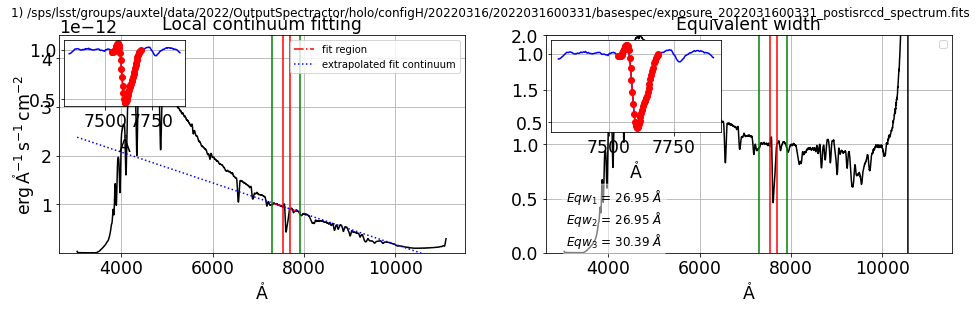

In [73]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
#eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,returnlineshape=False)
eq1,eq2,eq3,wl0,f0,wl1,f1=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2,returnlineshape=True)
plt.suptitle(thetitle)

In [74]:
eqw_o2=eq3
wl0_o2=wl0
wl1_o2=wl1
f0_o2=f0
f1_o2=f1

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

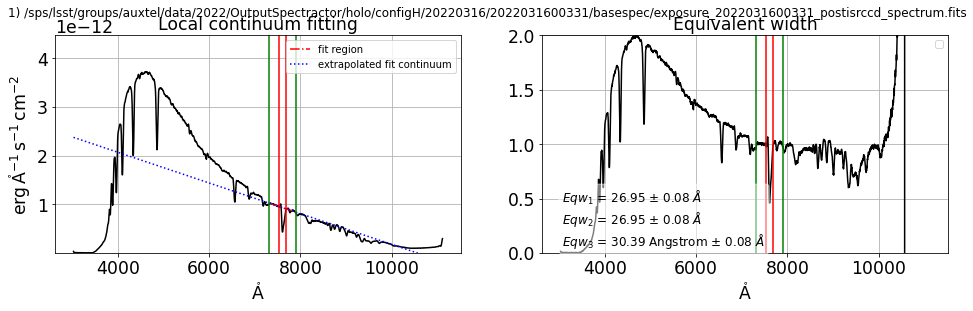

In [75]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

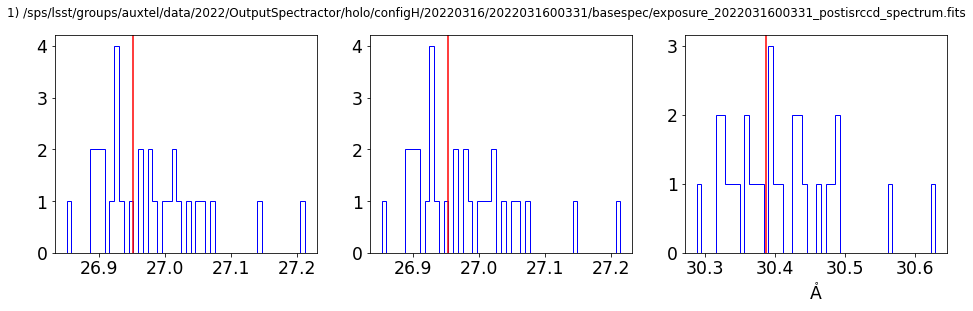

In [76]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color="b");
ax2.axvline(eqw20,color='r')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(eq3_set,bins=50,histtype='step',color="b");
ax3.axvline(eqw30,color='r')
plt.suptitle(thetitle)

In [77]:
eqw_o2_err=eq3_set.std()
eqw_o2_err

0.07573572126716879

### O2B Line

In [78]:
O2B.wavelength

687.472

In [79]:
wlmin=10*(O2B.wavelength-30)*u.AA
wlmax=10*(O2B.wavelength+30)*u.AA
wlminline=10*(O2B.wavelength-7)*u.AA
wlmaxline=10*(O2B.wavelength+9)*u.AA

In [80]:
wlmin_o2b = wlmin
wlmax_o2b = wlmax
wlminline_o2b = wlminline
wlmaxline_o2b = wlmaxline

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

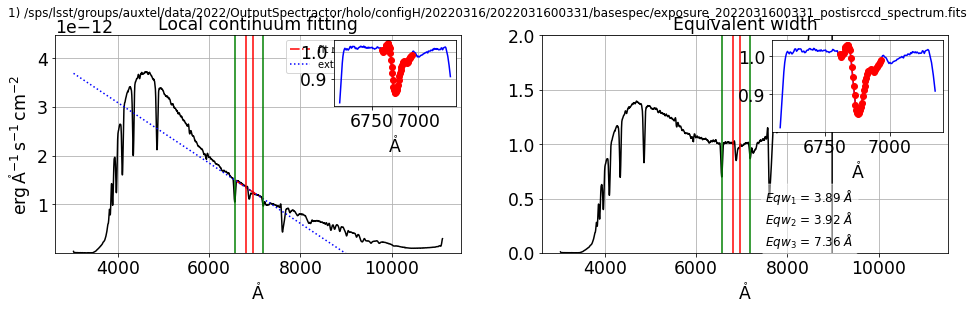

In [81]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
#eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3,wl0,f0,wl1,f1=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2,returnlineshape=True)
plt.suptitle(thetitle)

In [82]:
eqw_o2b=eq3
wl0_o2b=wl0
wl1_o2b=wl1
f0_o2b=f0
f1_o2b=f1

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

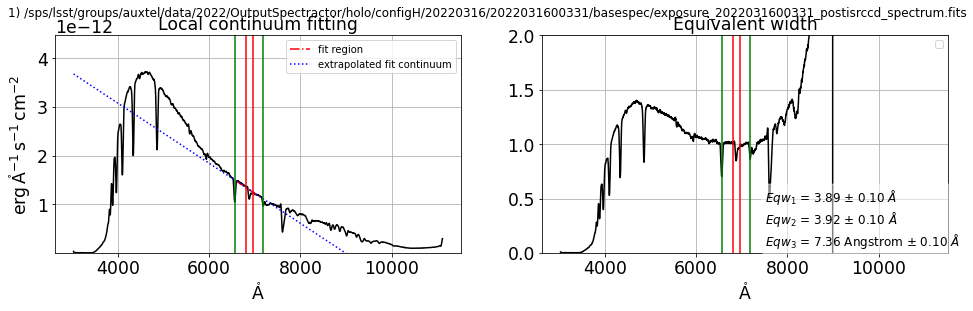

In [83]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [84]:
eqw_o2b_err=eq3_set.std()
eqw_o2b_err

0.10461948193608062

### H2O line

In [85]:
wlmin=10*(H2O_1.wavelength-30)*u.AA
wlmax=10*(H2O_2.wavelength+58)*u.AA
wlminline=10*(H2O_1.wavelength-12)*u.AA
wlmaxline=10*(H2O_2.wavelength+50)*u.AA

In [86]:
wlmin_h2o = wlmin
wlmax_h2o = wlmax
wlminline_h2o = wlminline
wlmaxline_h2o = wlmaxline

In [87]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

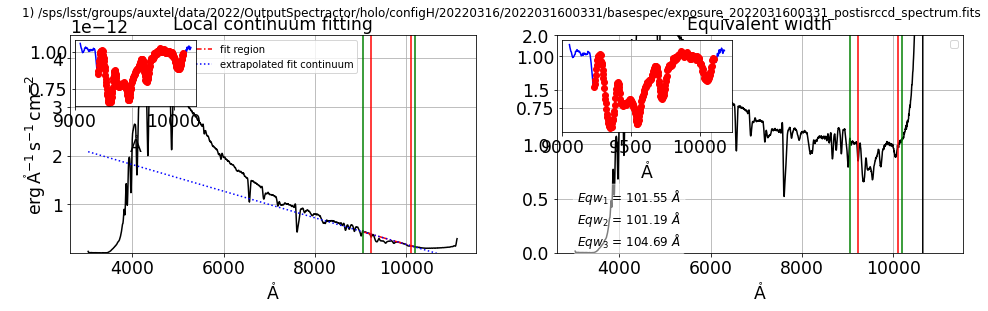

In [88]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
#eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3,wl0,f0,wl1,f1=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2,returnlineshape=True)
plt.suptitle(thetitle)

In [89]:
eqw_h2o=eq3
wl0_h2o=wl0
wl1_h2o=wl1
f0_h2o=f0
f1_h2o=f1

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

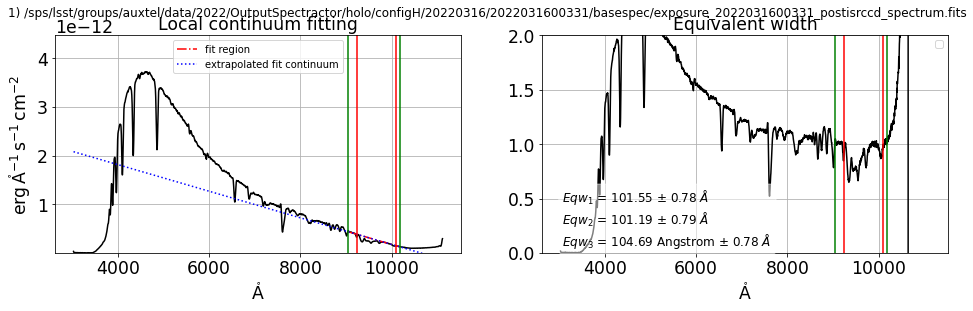

In [90]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

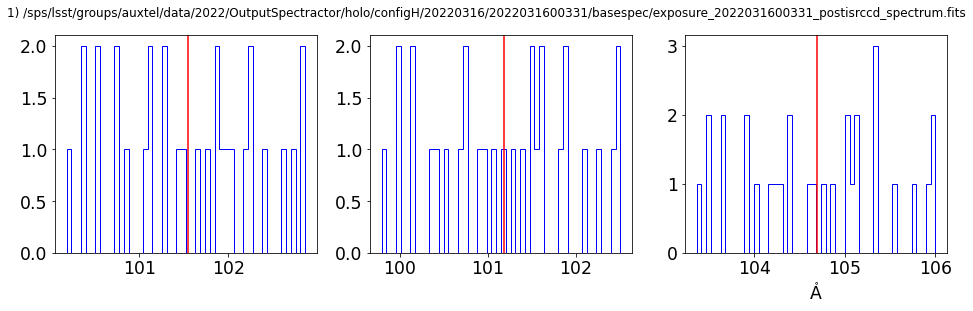

In [91]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color='b');
ax2.axvline(eqw20,color='r')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(eq3_set,bins=50,histtype='step',color='b');
ax3.axvline(eqw30,color='r')
plt.suptitle(thetitle)

In [92]:
eqw_h2o_err=eq3_set.std()
eqw_h2o_err

0.7814840198551618

## Other H2O lines

### H2O(730)

In [93]:
H2O_3 = Line(730, atmospheric=True, label=r'$H_2O_3$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [94]:
wlmin=10*(H2O_3.wavelength-22)*u.AA
wlmax=10*(H2O_3.wavelength+20)*u.AA
wlminline=10*(H2O_3.wavelength-17)*u.AA
wlmaxline=10*(H2O_3.wavelength+10)*u.AA

In [95]:
wlmin_h2o_2 = wlmin
wlmax_h2o_2 = wlmax
wlminline_h2o_2 = wlminline
wlmaxline_h2o_2 = wlmaxline

In [96]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

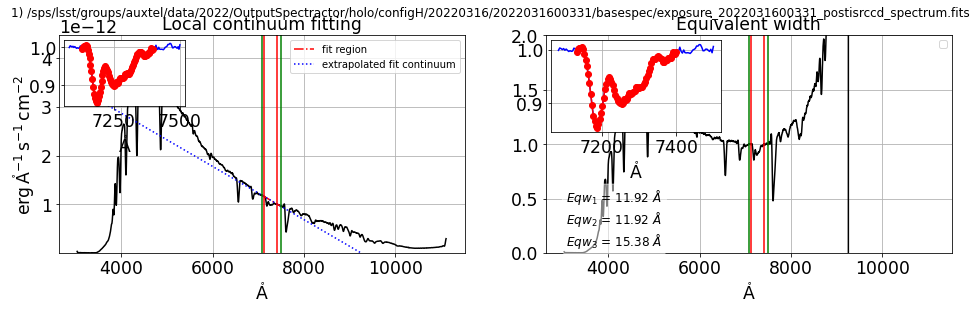

In [97]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3,wl0,f0,wl1,f1=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2,returnlineshape=True)
plt.suptitle(thetitle)


In [98]:
eqw_h2o_2=eq3
wl0_h2o_2=wl0
wl1_h2o_2=wl1
f0_h2o_2=f0
f1_h2o_2=f1

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

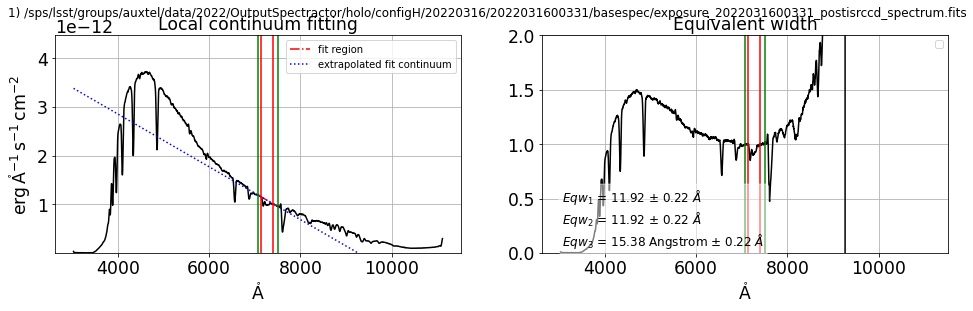

In [99]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

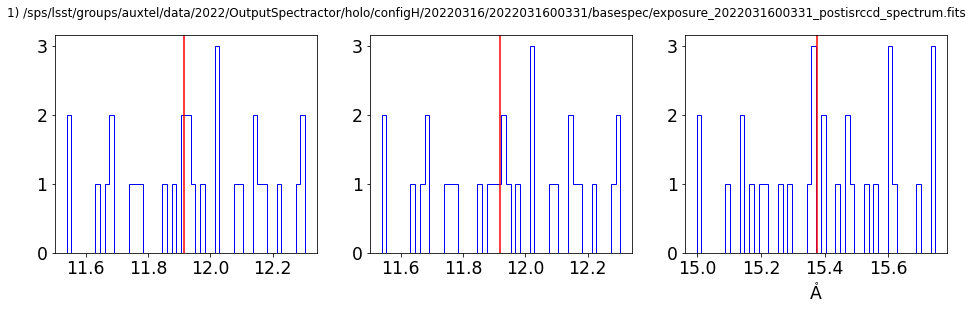

In [100]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color="b");
ax2.axvline(eqw20,color='r')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(eq3_set,bins=50,histtype='step',color="b");
ax3.axvline(eqw30,color='r')
plt.suptitle(thetitle)

In [101]:
eqw_h2o_2_err=eq3_set.std()
eqw_h2o_2_err

0.2159698943528455

### H2O(820)

In [102]:
H2O_4 = Line(820, atmospheric=True, label=r'$H_2O_4$', label_pos=[0.007, 0.02],width_bounds=[5, 30])  # libradtran paper fig.3, broad line

In [103]:
wlmin=10*(H2O_4.wavelength-20)*u.AA
wlmax=10*(H2O_4.wavelength+35)*u.AA
wlminline=10*(H2O_4.wavelength-10)*u.AA
wlmaxline=10*(H2O_4.wavelength+25)*u.AA

In [104]:
wlmin_h2o_3 = wlmin
wlmax_h2o_3 = wlmax
wlminline_h2o_3 = wlminline
wlmaxline_h2o_3 = wlmaxline

In [105]:
lamb = 10*s.lambdas * u.AA 
flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10. 
fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
spec = Spectrum1D(spectral_axis=lamb, flux=flux)
specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

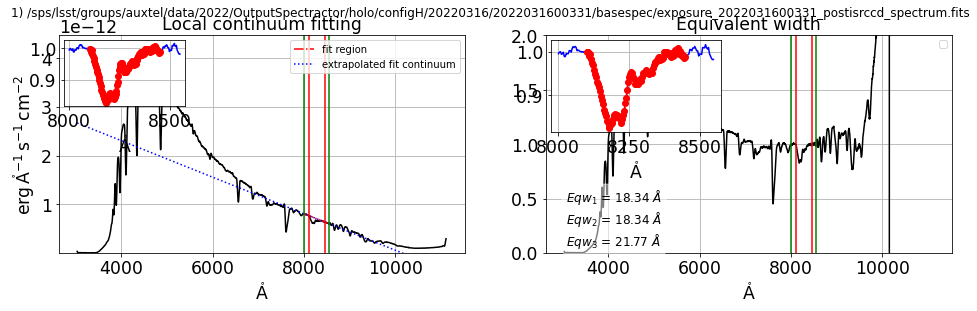

In [106]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3,wl0,f0,wl1,f1=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2,returnlineshape=True)
plt.suptitle(thetitle)

In [107]:
eqw_h2o_3=eq3
wl0_h2o_3=wl0
wl1_h2o_3=wl1
f0_h2o_3=f0
f1_h2o_3=f1

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

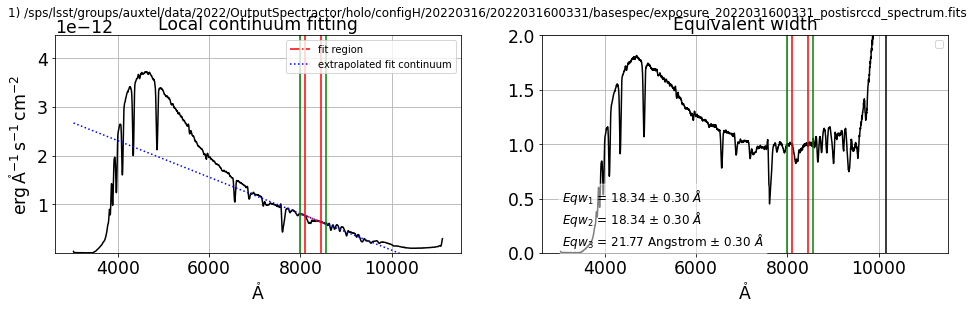

In [108]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

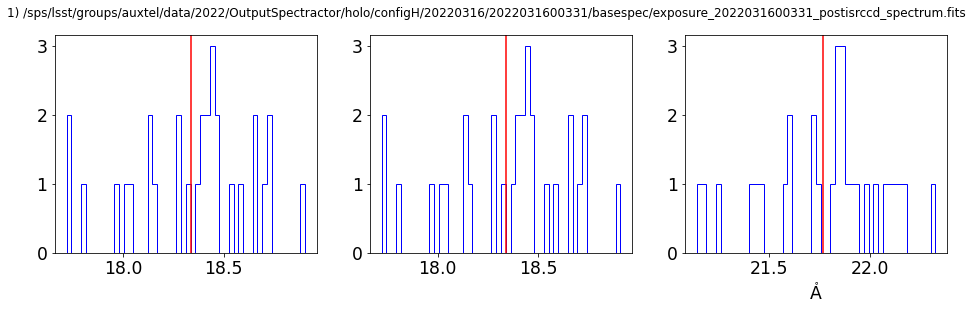

In [109]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 3, 1)
ax1.hist(eq1_set,bins=50,histtype='step',color='b');
ax1.axvline(eqw10,color='r')
ax2 = fig.add_subplot(1, 3, 2)
ax2.hist(eq2_set,bins=50,histtype='step',color="b");
ax2.axvline(eqw20,color='r')
ax3 = fig.add_subplot(1, 3, 3)
ax3.hist(eq3_set,bins=50,histtype='step',color="b");
ax3.axvline(eqw30,color='r')
plt.suptitle(thetitle)

In [110]:
eqw_h2o_3_err=eq3_set.std()
eqw_h2o_3_err

0.29568644210412265

### HALPHA

In [111]:
wlmin=10*(HALPHA.wavelength-30)*u.AA
wlmax=10*(HALPHA.wavelength+30)*u.AA
wlminline=10*(HALPHA.wavelength-10)*u.AA
wlmaxline=10*(HALPHA.wavelength+10)*u.AA

In [112]:
wlmin_halpha = wlmin
wlmax_halpha = wlmax
wlminline_halpha = wlminline
wlmaxline_halpha = wlmaxline

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

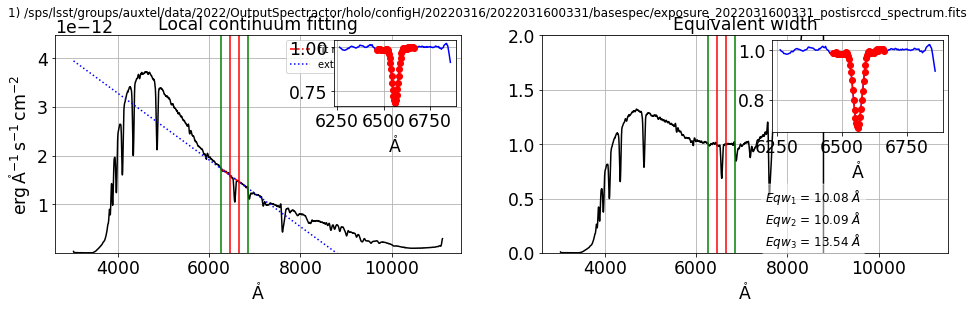

In [113]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
#eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3,wl0,f0,wl1,f1=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2,returnlineshape=True)
plt.suptitle(thetitle)

In [114]:
eqw_halpha=eq3
wl0_halpha=wl0
wl1_halpha=wl1
f0_halpha=f0
f1_halpha=f1

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

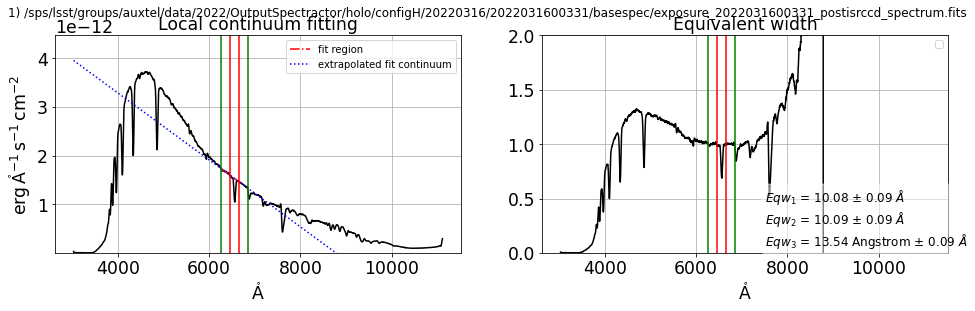

In [115]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [116]:
eqw_halpha_err=eq3_set.std()
eqw_halpha_err

0.09251136403434859

### HBETA

In [117]:
wlmin=10*(HBETA.wavelength-35)*u.AA
wlmax=10*(HBETA.wavelength+30)*u.AA
wlminline=10*(HBETA.wavelength-7)*u.AA
wlmaxline=10*(HBETA.wavelength+7)*u.AA

In [118]:
wlmin_hbeta = wlmin
wlmax_hbeta = wlmax
wlminline_hbeta = wlminline
wlmaxline_hbeta = wlmaxline

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

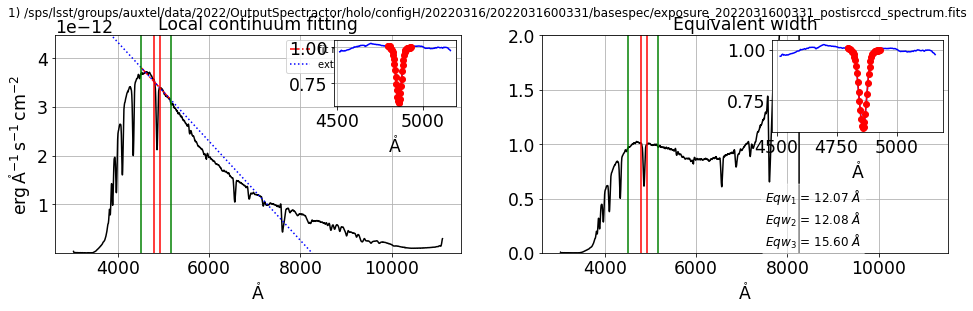

In [119]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
#eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3,wl0,f0,wl1,f1=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2,returnlineshape=True)
plt.suptitle(thetitle)

In [120]:
eqw_hbeta=eq3
wl0_hbeta=wl0
wl1_hbeta=wl1
f0_hbeta=f0
f1_hbeta=f1

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

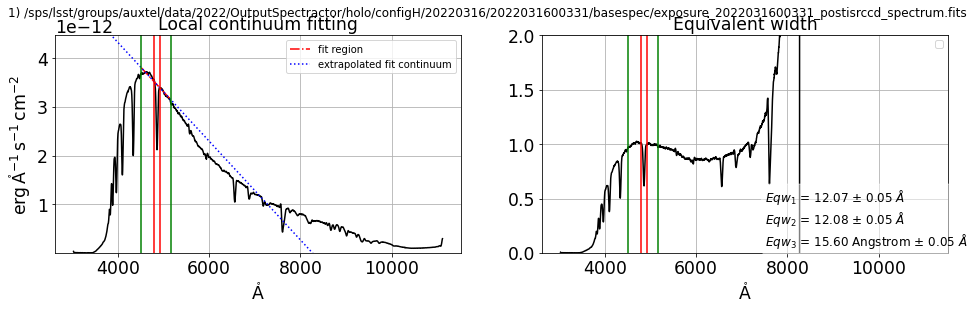

In [121]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eqw30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [122]:
eqw_hbeta_err=eq3_set.std()
eqw_hbeta_err

0.04573544259117857

### HGAMMA

In [123]:
wlmin=10*(HGAMMA.wavelength-10)*u.AA
wlmax=10*(HGAMMA.wavelength+10)*u.AA
wlminline=10*(HGAMMA.wavelength-6)*u.AA
wlmaxline=10*(HGAMMA.wavelength+7)*u.AA

In [124]:
wlmin_hgamma = wlmin
wlmax_hgamma = wlmax
wlminline_hgamma = wlminline
wlmaxline_hgamma = wlmaxline

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

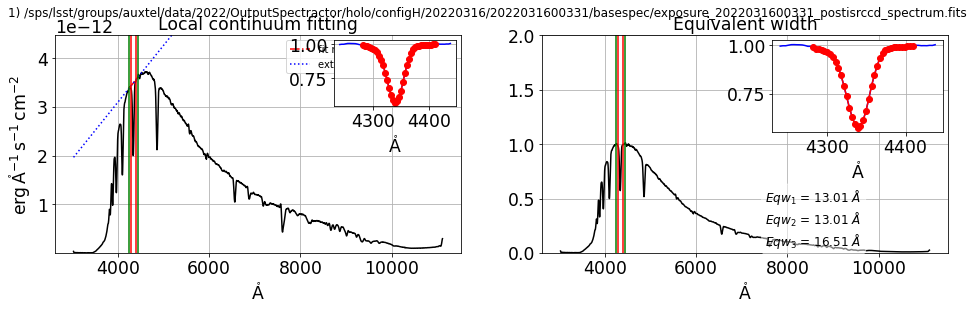

In [125]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
#eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
#eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
eq1,eq2,eq3,wl0,f0,wl1,f1=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2,returnlineshape=True)
plt.suptitle(thetitle)

In [126]:
eqw_hgamma=eq3
wl0_hgamma=wl0
wl1_hgamma=wl1
f0_hgamma=f0
f1_hgamma=f1

Text(0.5, 0.98, '1) /sps/lsst/groups/auxtel/data/2022/OutputSpectractor/holo/configH/20220316/2022031600331/basespec/exposure_2022031600331_postisrccd_spectrum.fits')

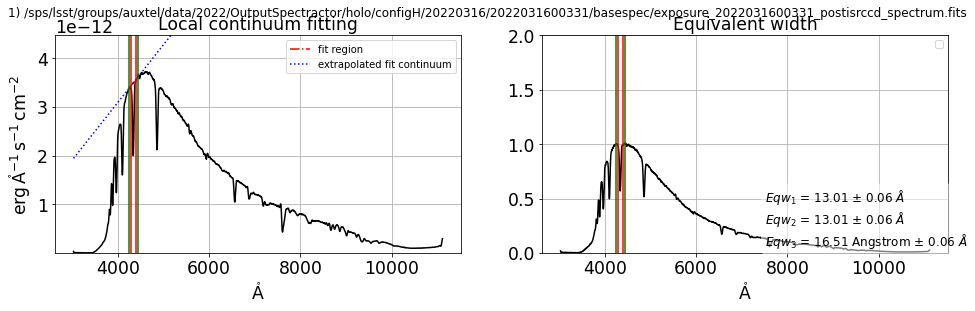

In [127]:
fig=plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
eqw10,eqw20,eq30,eq1_set,eq2_set,eq3_set=ComputeMyEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=30,flag_plot=True,ax1=ax1,ax2=ax2)
plt.suptitle(thetitle)

In [128]:
eqw_hgamma_err=eq3_set.std()
eqw_hgamma_err

0.05986492387041175

## Summary of absorption line shape 

Text(0.5, 1.02, ' Equivalent widths, target ETA1 DOR, night 20220316')

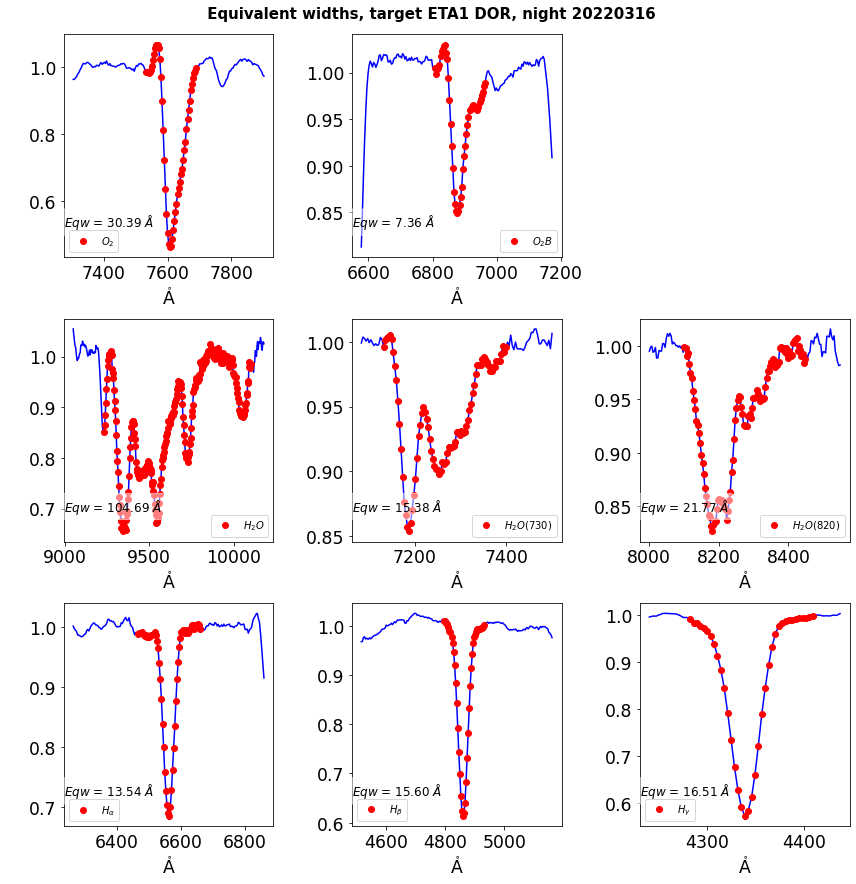

In [129]:
fig=plt.figure(figsize=(12,12))


ax = fig.add_subplot(3, 3, 1)
ax.plot(wl1_o2,f1_o2,'b-')
ax.plot(wl0_o2,f0_o2,'or',label="$O_2$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_o2)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.legend()

ax = fig.add_subplot(3, 3, 2)
ax.plot(wl1_o2b,f1_o2b,'b-')
ax.plot(wl0_o2b,f0_o2b,'or',label="$O_2B$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_o2b)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.legend()

ax = fig.add_subplot(3, 3, 4)
ax.plot(wl1_h2o,f1_h2o,'b-')
ax.plot(wl0_h2o,f0_h2o,'or',label="$H_2O$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_h2o)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.legend()

ax = fig.add_subplot(3, 3, 5)
ax.plot(wl1_h2o_2,f1_h2o_2,'b-')
ax.plot(wl0_h2o_2,f0_h2o_2,'or',label="$H_2O(730)$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_h2o_2)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.legend()

ax = fig.add_subplot(3, 3, 6)
ax.plot(wl1_h2o_3,f1_h2o_3,'b-')
ax.plot(wl0_h2o_3,f0_h2o_3,'or',label="$H_2O(820)$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_h2o_3)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.legend()

ax = fig.add_subplot(3, 3, 7)
ax.plot(wl1_halpha,f1_halpha,'b-')
ax.plot(wl0_halpha,f0_halpha,'or',label="$H_\\alpha$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_halpha)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.legend()


ax = fig.add_subplot(3, 3, 8)
ax.plot(wl1_hbeta,f1_hbeta,'b-')
ax.plot(wl0_hbeta,f0_hbeta,'or',label="$H_\\beta$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_hbeta)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.legend()


ax = fig.add_subplot(3, 3, 9)
ax.plot(wl1_hgamma,f1_hgamma,'b-')
ax.plot(wl0_hgamma,f0_hgamma,'or',label="$H_\\gamma$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_hgamma)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.legend()

plt.tight_layout()
title=f" Equivalent widths, target {targetname}, night {DATE}"
plt.suptitle(title,fontweight="bold",fontsize=15,y=1.02)

Text(0.5, 1.02, ' Equivalent widths, target ETA1 DOR, night 20220316')

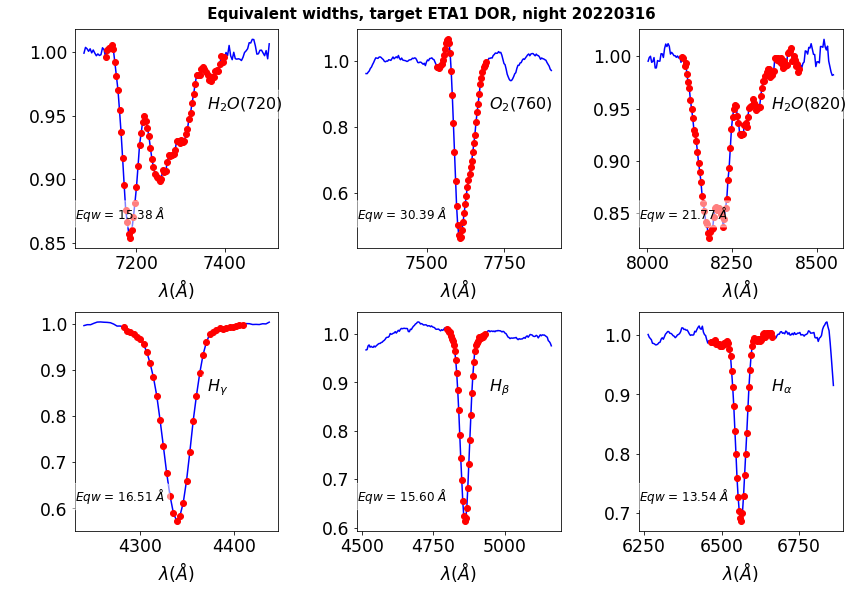

In [130]:
fig=plt.figure(figsize=(12,8))


ax = fig.add_subplot(2, 3, 2)
ax.plot(wl1_o2,f1_o2,'b-')
ax.plot(wl0_o2,f0_o2,'or',label="$O_2$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_o2)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$O_2(760)$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()


ax = fig.add_subplot(2, 3, 1)
ax.plot(wl1_h2o_2,f1_h2o_2,'b-')
ax.plot(wl0_h2o_2,f0_h2o_2,'or',label="$H_2O(730)$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_h2o_2)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$H_2O(720)$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()

ax = fig.add_subplot(2, 3, 3)
ax.plot(wl1_h2o_3,f1_h2o_3,'b-')
ax.plot(wl0_h2o_3,f0_h2o_3,'or',label="$H_2O(820)$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_h2o_3)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$H_2O(820)$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()

ax = fig.add_subplot(2, 3, 6)
ax.plot(wl1_halpha,f1_halpha,'b-')
ax.plot(wl0_halpha,f0_halpha,'or',label="$H_\\alpha$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_halpha)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$H_\\alpha$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()


ax = fig.add_subplot(2, 3, 5)
ax.plot(wl1_hbeta,f1_hbeta,'b-')
ax.plot(wl0_hbeta,f0_hbeta,'or',label="$H_\\beta$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_hbeta)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$H_\\beta$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()


ax = fig.add_subplot(2, 3, 4)
ax.plot(wl1_hgamma,f1_hgamma,'b-')
ax.plot(wl0_hgamma,f0_hgamma,'or',label="$H_\\gamma$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_hgamma)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$H_\\gamma$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()

plt.tight_layout()
title=f" Equivalent widths, target {targetname}, night {DATE}"
plt.suptitle(title,fontweight="bold",fontsize=15,y=1.02)

Text(0.5, 1.02, ' Equivalent widths, target ETA1 DOR, night 20220316')

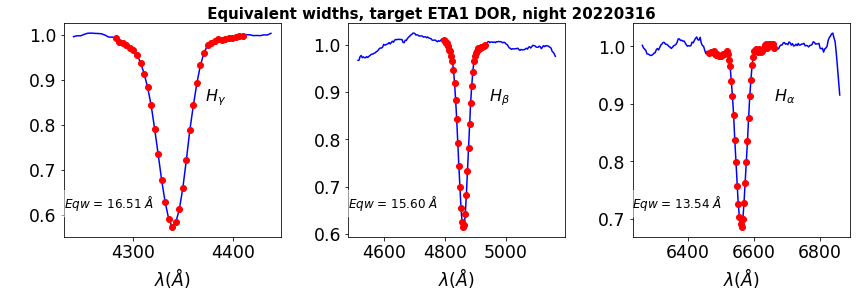

In [132]:
fig=plt.figure(figsize=(12,4))



ax = fig.add_subplot(1, 3, 3)
ax.plot(wl1_halpha,f1_halpha,'b-')
ax.plot(wl0_halpha,f0_halpha,'or',label="$H_\\alpha$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_halpha)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$H_\\alpha$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()


ax = fig.add_subplot(1, 3, 2)
ax.plot(wl1_hbeta,f1_hbeta,'b-')
ax.plot(wl0_hbeta,f0_hbeta,'or',label="$H_\\beta$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_hbeta)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$H_\\beta$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()


ax = fig.add_subplot(1, 3, 1)
ax.plot(wl1_hgamma,f1_hgamma,'b-')
ax.plot(wl0_hgamma,f0_hgamma,'or',label="$H_\\gamma$")
eqw_str="$Eqw$ = {:2.2f} $\AA$ ".format(eqw_hgamma)
ax.text(0.0, 0.2, eqw_str, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
ax.text(0.65, 0.7, "$H_\\gamma$", transform=ax.transAxes, fontsize=16,fontweight="bold",verticalalignment='top', bbox=props)
ax.set_xlabel("$\lambda (\\AA)$")
#ax.legend()

plt.tight_layout()
title=f" Equivalent widths, target {targetname}, night {DATE}"
plt.suptitle(title,fontweight="bold",fontsize=15,y=1.02)

In [131]:
assert False

AssertionError: 

# LOOP on spectra to calculate equivalent width

## LOOP on O2 lines

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):

    
    
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    
    print(IDXSEL,") ",filename_SEL)
    
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # O2 line
    # wlmin=10*(O2_1.wavelength-30)*u.AA
    #wlmax=10*(O2_1.wavelength+30)*u.AA
    #wlminline=10*(O2_1.wavelength-10)*u.AA
    #wlmaxline=10*(O2_1.wavelength+10)*u.AA
    
    
    wlmin = wlmin_o2
    wlmax = wlmax_o2
    wlminline = wlminline_o2
    wlmaxline = wlmaxline_o2
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_O2=",eq3)
    
    df_infos.at[IDXSEL,"eqw_o2"] =  eq3


## LOOP on O2B

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):

    
    
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    
    print(IDXSEL,") ",filename_SEL)
    
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # O2 line
    # wlmin=10*(O2_1.wavelength-30)*u.AA
    #wlmax=10*(O2_1.wavelength+30)*u.AA
    #wlminline=10*(O2_1.wavelength-10)*u.AA
    #wlmaxline=10*(O2_1.wavelength+10)*u.AA
    
    
    wlmin = wlmin_o2b
    wlmax = wlmax_o2b
    wlminline = wlminline_o2b
    wlmaxline = wlmaxline_o2b
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eq1,eq2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eq1,eq2,eq3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_O2b=",eq3)
    
    df_infos.at[IDXSEL,"eqw_o2b"] =  eq3


## LOOP on H2O line

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_h2o
    wlmax = wlmax_h2o
    wlminline = wlminline_h2o
    wlmaxline = wlmaxline_h2o
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_h2o=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_h2o"] =  eqw3


## LOOP on H2O(730) line

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_h2o_2
    wlmax = wlmax_h2o_2
    wlminline = wlminline_h2o_2
    wlmaxline = wlmaxline_h2o_2
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_h2o_2=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_h2o_2"] =  eqw3


In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_h2o_3
    wlmax = wlmax_h2o_3
    wlminline = wlminline_h2o_3
    wlmaxline = wlmaxline_h2o_3
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_h2o_3=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_h2o_3"] =  eqw3


## LOOP on H_alpha

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_halpha
    wlmax = wlmax_halpha
    wlminline = wlminline_halpha
    wlmaxline = wlmaxline_halpha
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_halpha=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_halpha"] =  eqw3


## LOOP on H_beta

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_hbeta
    wlmax = wlmax_hbeta
    wlminline = wlminline_hbeta
    wlmaxline = wlmaxline_hbeta
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_hbeta=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_hbeta"] =  eqw3


## LOOP on H_gamma

In [ ]:
WLMIN=300
WLMAX=1000
lambdas = np.arange(WLMIN,WLMAX,1)
fwhm_func = interp1d(lambdas, 0.01 * lambdas)
parameters.DISPLAY=False


for IDXSEL in np.arange(0,NN):
    filename_SEL=all_good_spectra_spectrum_files[IDXSEL]
    filename_spectrogram_SEL=filename_SEL.replace("_spectrum","_spectrogram")
    fullfilename_SEL = os.path.join(dir_spectra,filename_SEL)
    fullfilename_spectrogram_SEL = fullfilename_SEL.replace("_spectrum","_spectrogram")
    
    # load the spectrum
    s=Spectrum(fullfilename_SEL, config=config)
    s.load_spectrogram(fullfilename_spectrogram_SEL) 
    
    
    lamb = 10*s.lambdas * u.AA 
    flux = s.data * u.Unit('erg cm-2 s-1 AA-1')/10 
    spec = Spectrum1D(spectral_axis=lamb, flux=flux) 
    fluxerr = s.err * u.Unit('erg cm-2 s-1 AA-1')/10. 
    specerr = Spectrum1D(spectral_axis=lamb, flux=fluxerr)
    
    # H2O line
    
    #wlmin=10*(H2O_1.wavelength-30)*u.AA
    #wlmax=10*(H2O_2.wavelength+30)*u.AA
    #wlminline=10*(H2O_1.wavelength-12)*u.AA
    #wlmaxline=10*(H2O_2.wavelength+10)*u.AA
    
    wlmin = wlmin_hgamma
    wlmax = wlmax_hgamma
    wlminline = wlminline_hgamma
    wlmaxline = wlmaxline_hgamma
    
    
    fig=plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    #eqw1,eqw2=ComputeEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    eqw1,eqw2,eqw3=ComputeMyEquivWidth(spec,wlmin,wlmax,wlminline,wlmaxline,flag_plot=True,ax1=ax1,ax2=ax2)
    #eqw10,eqw20,eq1_set,eq2_set=ComputeEquivWidth_bootstrap(spec,specerr,wlmin,wlmax,wlminline,wlmaxline,NN=20,flag_plot=True,ax1=ax1,ax2=ax2)
    thetitle=str(IDXSEL)+") "+filename_SEL
    plt.suptitle(thetitle,y=1.01)
    plt.show() 
    
    print(IDXSEL,") eqw_hgamma=",eqw3)
    
    df_infos.at[IDXSEL,"eqw_hgamma"] =  eqw3


# add equivalent width error

In [ ]:
df_infos["eqw_h2o_err"] = eqw_h2o_err
df_infos["eqw_h2o_2_err"] = eqw_h2o_2_err
df_infos["eqw_h2o_3_err"] = eqw_h2o_3_err
df_infos["eqw_o2_err"] = eqw_o2_err
df_infos["eqw_o2b_err"] = eqw_o2b_err
df_infos["eqw_halpha_err"] = eqw_halpha_err
df_infos["eqw_hbeta_err"] = eqw_hbeta_err
df_infos["eqw_hgamma_err"] = eqw_hgamma_err

### Info on equivalent width summary

In [ ]:
df_infos

In [ ]:
summary_file = f"equivwidth_{DATE}_{configdir}.csv"
df_infos.to_csv(summary_file)

In [ ]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
ax.plot(df_infos['date_obs'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2b)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
ax.plot(df_infos['date_obs'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
ax.plot(df_infos['date_obs'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
ax.plot(df_infos['date_obs'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
ax2.plot(df_infos['date_obs'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass")
ax2.set_ylim(1,2.5)
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

In [ ]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
df_infos.plot(ax=ax,x="date_obs", y=["eqw_o2","eqw_o2b","eqw_h2o","eqw_halpha","eqw_hbeta","eqw_hgamma"],color=["r","pink","b","m","orange","cyan"],marker="o");
#plt.gcf().autofmt_xdate(rotation=90) 
ax.xaxis.set_tick_params(rotation=90)
ax.legend(loc="upper right")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale("log")

ax2 = ax.twinx()
df_infos.plot(ax=ax2,x="date_obs", y="airmass",color=["g"],marker="o",lw=0);
ax2.legend(loc="upper left")
ax2.set_ylabel("airmass")
ax2.set_ylim(1,2.5)
ax2.xaxis.set_tick_params(rotation=90)
ax.set_title("Equivalent Widths vs date")



In [ ]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2b)$");
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")

ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

curves = [p1, p11,p2, p3, p4,p5,p6]
ax.legend(curves, [c.get_label() for c in curves])
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())

In [ ]:
fig=plt.figure(figsize=(16,8))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2b)$");
p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.set_ylabel("Equivalent Width $\AA$")
ax.set_yscale('log')
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax2.set_yscale('log')
ax.set_title("Equivalent Widths vs date")

curves = [p1, p2, p3, p4, p5, p6]
ax.legend(curves, [c.get_label() for c in curves])
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())


In [ ]:
fig=plt.figure(figsize=(16,16))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['reftime'], df_infos['eqw_o2'],marker="o",color="red",label="$eqw(O_2)$");
p11, = ax.plot(df_infos['reftime'], df_infos['eqw_o2b'],marker="o",color="pink",label="$eqw(O_2b)$");
#p2, = ax.plot(df_infos['reftime'], df_infos['eqw_h2o'],marker="o",color="blue",label="$eqw(H_2O)$");
p3, = ax.plot(df_infos['reftime'], df_infos['eqw_halpha'],marker="o",color="magenta",label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['reftime'], df_infos['eqw_hbeta'],marker="o",color="orange",label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['reftime'], df_infos['eqw_hgamma'],marker="o",color="cyan",label="$eqw(H_{\\gamma})$");
#ax.set_xticks(rotation='vertical');
#ax.xaxis.set_tick_params(rotation=90)
ax.set_xlabel("number of hours")
ax.grid()

ax.set_ylabel("Equivalent Width $\AA$")
ax2 = ax.twinx()
p6, = ax2.plot(df_infos['reftime'], df_infos['airmass'],linestyle='dotted', marker='.',color="green",label="airmass",lw=0.5)
ax2.set_ylim(1,2.5)

ax2.set_ylabel("airmass")
ax.set_title("Equivalent Widths vs date")

curves = [p1, p11,p2, p3, p4,p5,p6]
ax.legend(curves, [c.get_label() for c in curves])
ax2.yaxis.label.set_color(p6.get_color())
ax2.spines["right"].set_edgecolor(p6.get_color())
ax2.tick_params(axis='y', colors=p6.get_color())

In [ ]:
fig=plt.figure(figsize=(16,16))
#plt.xticks(rotation=90)
ax = fig.add_subplot(1, 1, 1)
p1, = ax.plot(df_infos['airmass'], df_infos['eqw_o2'],marker="o",color="red",lw=0,label="$eqw(O_2)$");
p11, = ax.plot(df_infos['airmass'], df_infos['eqw_o2b'],marker="o",color="pink",lw=0,label="$eqw(O_2b)$");
p3, = ax.plot(df_infos['airmass'], df_infos['eqw_halpha'],marker="o",color="magenta",lw=0,label="$eqw(H_{\\alpha})$");
p4, = ax.plot(df_infos['airmass'], df_infos['eqw_hbeta'],marker="o",color="orange",lw=0,label="$eqw(H_{\\beta})$");
p5, = ax.plot(df_infos['airmass'], df_infos['eqw_hgamma'],marker="o",color="cyan",lw=0,label="$eqw(H_{\\gamma})$");

ax.set_xlabel("airmass")
ax.grid()
